## **IMPORTS**

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import module.preprocessing as preprocessing
import module.outliers as outliers
import module.visualization as visualization

from sklearn.model_selection import train_test_split

## **DATASET READING**

In [13]:
df = pd.read_csv("data/data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## **DATA EXPLORATION**

Visualizziamo un **riepilogo generale** del dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Visualizziamo il **numero di Righe e Colonne** da cui è composto il dataset

In [15]:
df.shape # 6819 righe, 96 colonne

(6819, 96)

Visualizziamo da **quali colonne** è composto il dataset

In [16]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Verifichiamo se ci sono **dati mancanti** (NA) nel datatset

In [17]:
any(df.isna().sum() > 1) # Non ci sono dati mancanti

False

Verifichiamo se il Target (y) è **binario**:
- La riga di codice seleziona le righe del dataset per cui i valori di Bancarotta sono **diversi** da 0 e 1
- Il codice restituisce un **dataset vuoto** (senza righe), quindi vuol dire che nella colonna Bancarotta ci sono **solo 0 e 1**, ovvero è binaria

In [18]:
df[df["Bankrupt?"].isin([0,1]) == 'False']

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


Verifichiamo come sono distribuite le **classi del Target**:
- C'è una **distribuzione asimmetrica** tra le classi del Target, con **prevalenza della classe 0**

In [19]:
df['Bankrupt?'].value_counts() # 0: 6599; 1: 220

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Verifichiamo se ci sono **duplicati** nel dataset:
- La dimensione del dataset **senza duplicati** è **uguale** a quella del dataset **originale** (True), quindi **non ci sono duplicati**.

In [20]:
df.drop_duplicates().shape == df.shape # Non ci sono duplicati

True

Verifichiamo come sono distribuite le **classi del Target**:
- C'è una **distribuzione asimmetrica** tra le classi del Target, con **prevalenza della classe 0**

In [21]:
df['Bankrupt?'].value_counts() # 0: 6599; 1: 220

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Verifichiamo se ci sono **duplicati** nel dataset:
- La dimensione del dataset **senza duplicati** è **uguale** a quella del dataset **originale** (True), quindi **non ci sono duplicati**.

In [22]:
df.drop_duplicates().shape == df.shape # Non ci sono duplicati

True

## **DATA PRE-PROCESSING**

In questa sezionae, eseguiamo tre operazioni:
1. **Rinominiamo** le colonne del dataset in **Italiano**
2. Eseguiamo un **primo filtraggio** delle colonne, escludendo dal dataset quelle che esprimono misure **già presenti** in altre colonne
3. Eseguiamo un **secondo filtraggio** delle colonne, selezionado solo quelle che presentano la **minima correlazione** tra di esse, attraverso l'uso del **VIF**

In [23]:
# Rinomino le colonne in italiano
X_uncorr_renamed = preprocessing.rename_columns(df)

In [24]:
# Eseguo il primo filtraggio delle colonne
X_uncorr_first_filter = preprocessing.first_column_selection(X_uncorr_renamed)

In [25]:
# Eseguo il secondo filtraggio delle colonne
X_uncorr = preprocessing.second_column_selection(X_uncorr_first_filter)

## **VISUALIZATION - NUMERICAL DISTRIBUTIONS**

Con **features_numerical_distribution_boxplot()**, visualizziamo tramite boxplot la **distribuzione delle classi per ogni Features**

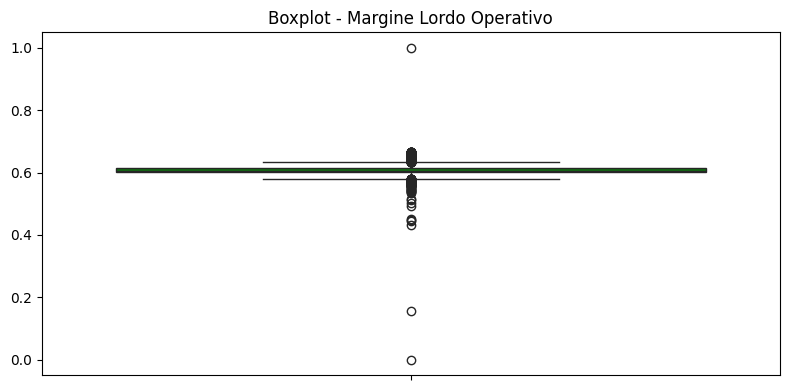

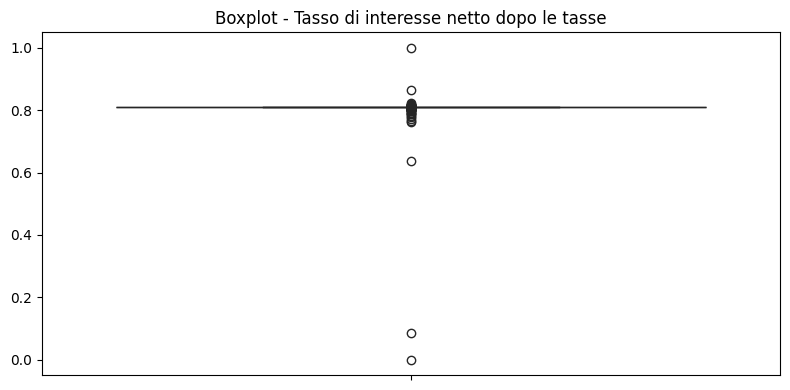

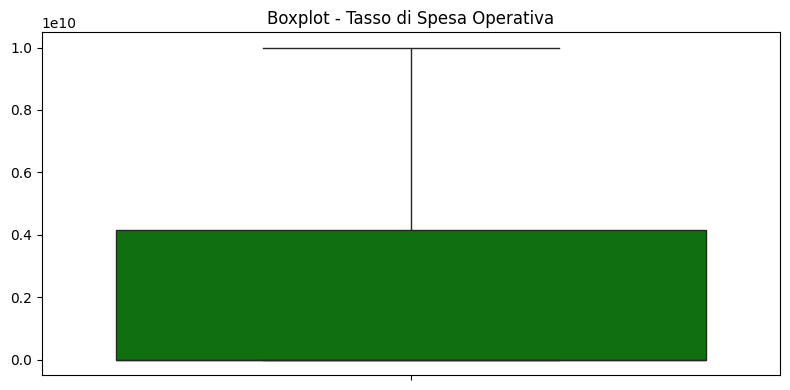

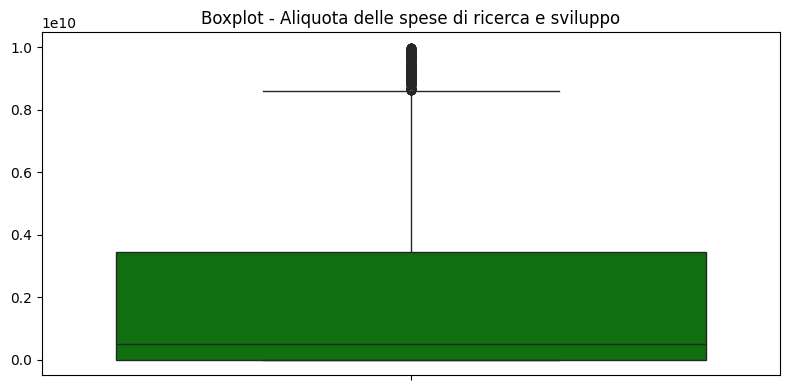

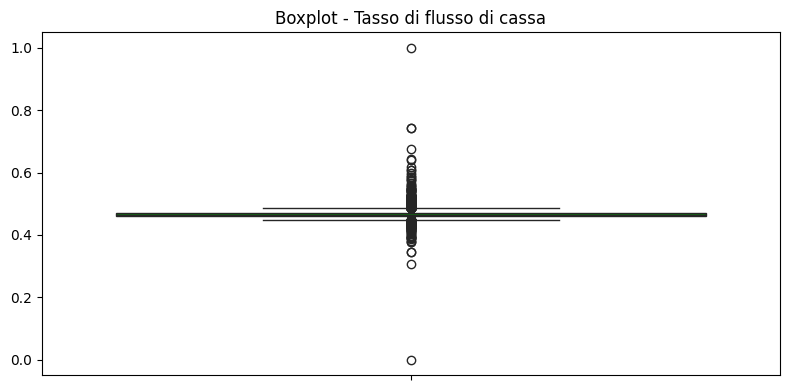

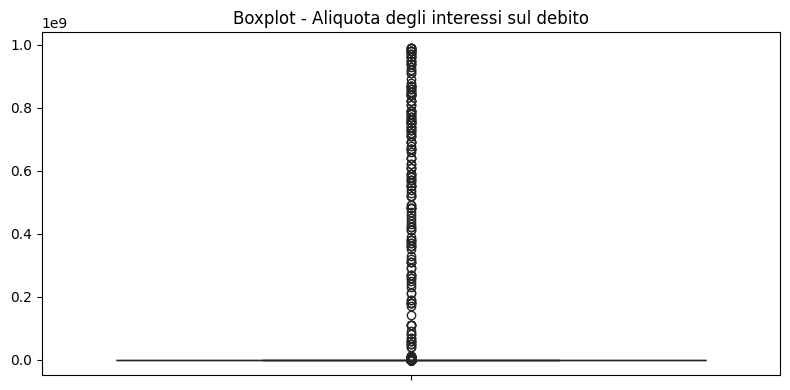

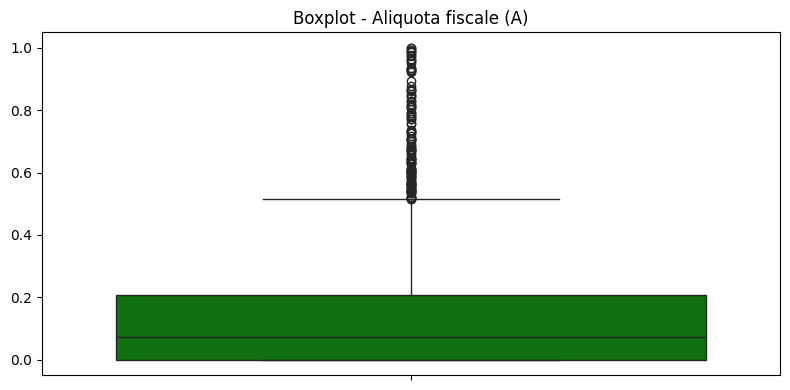

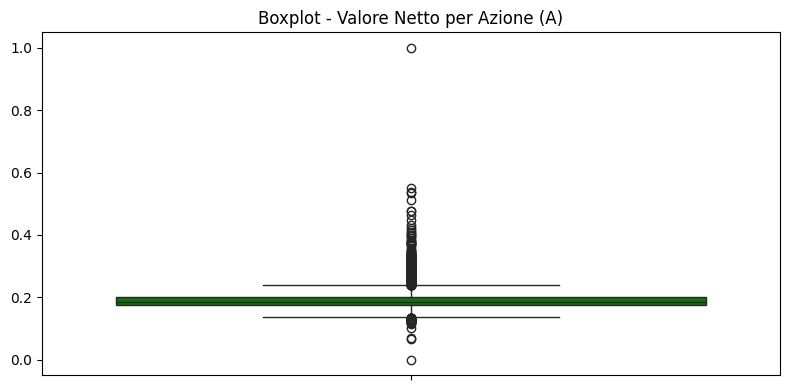

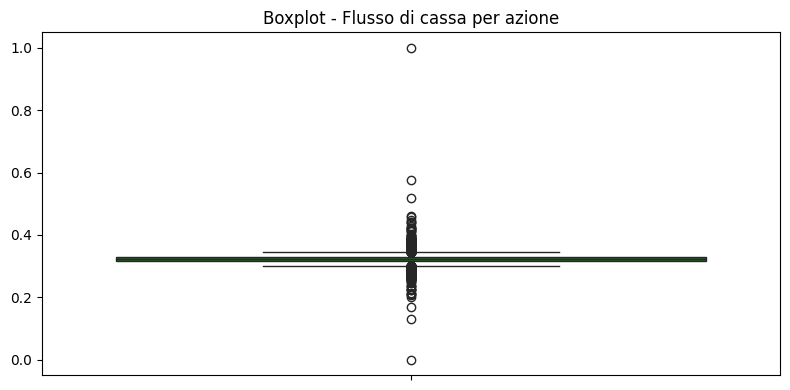

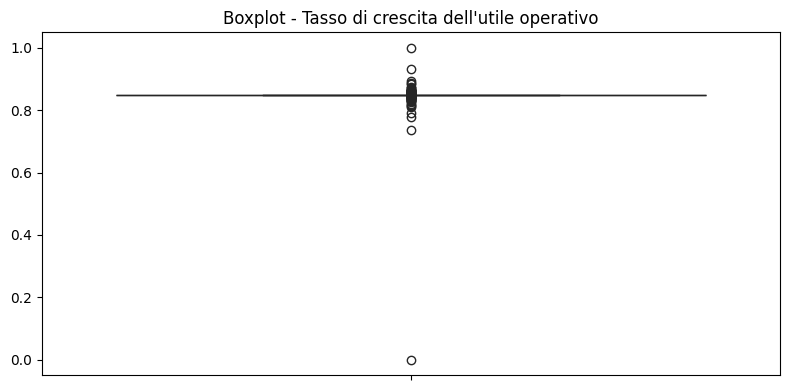

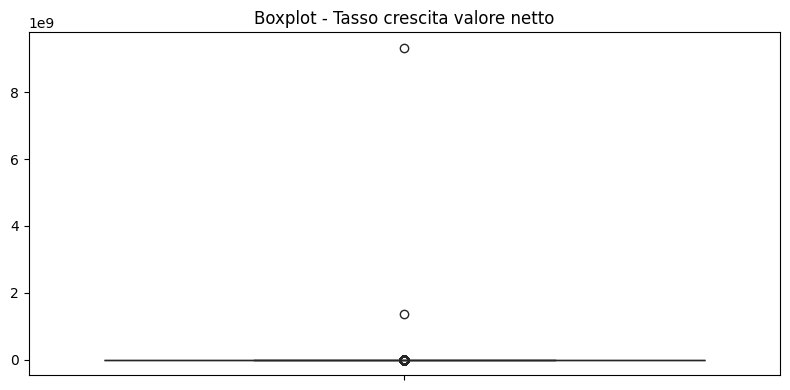

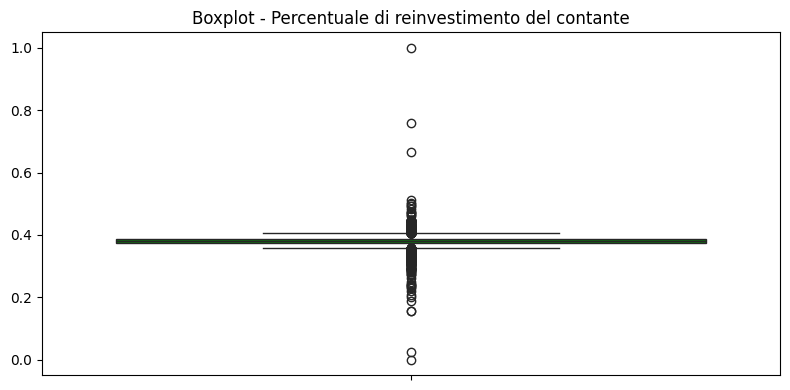

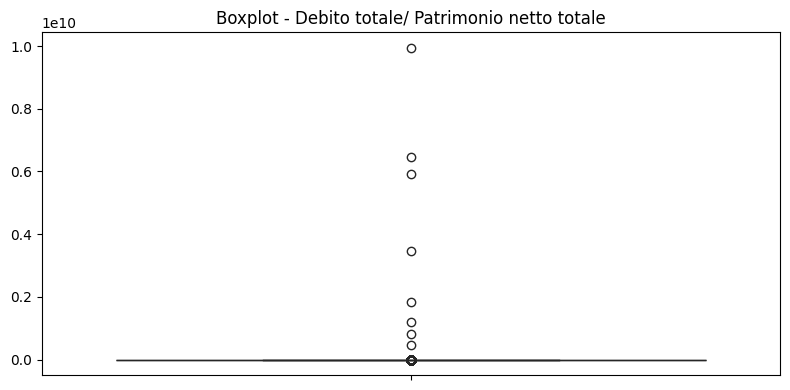

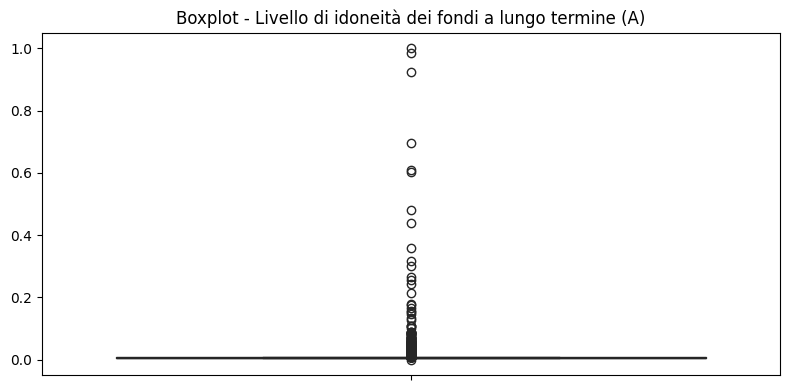

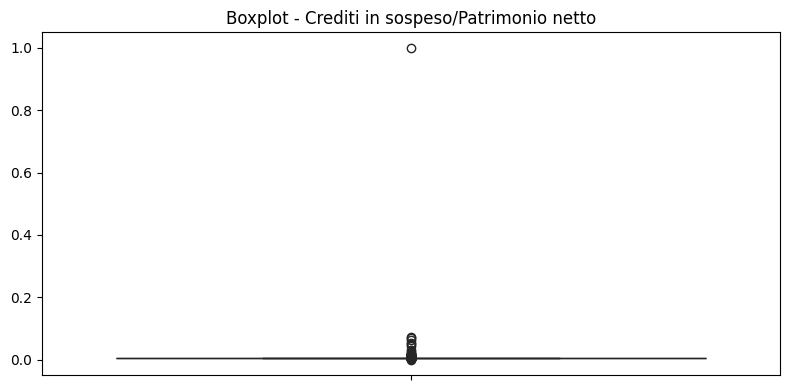

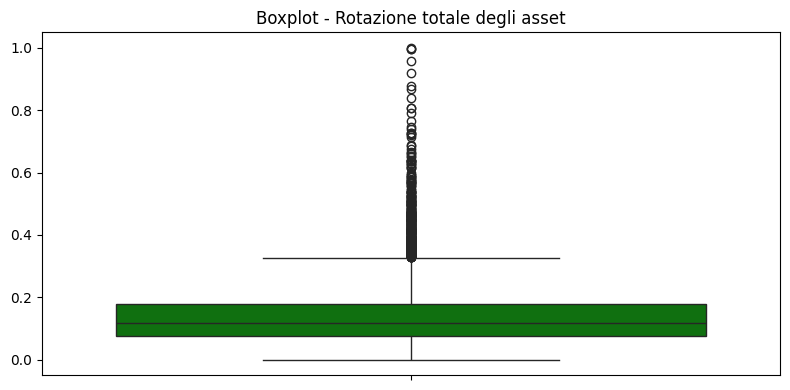

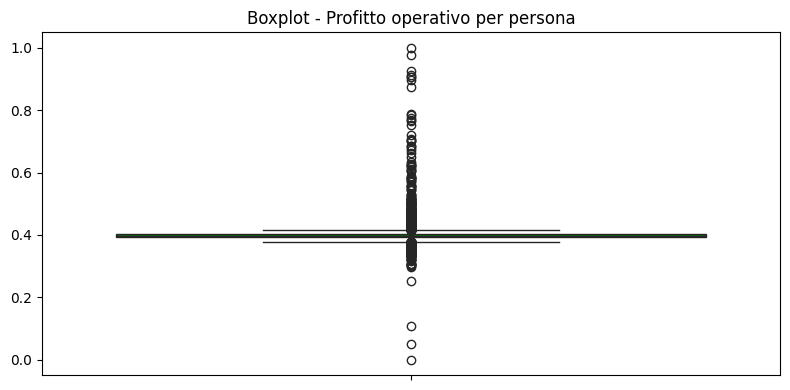

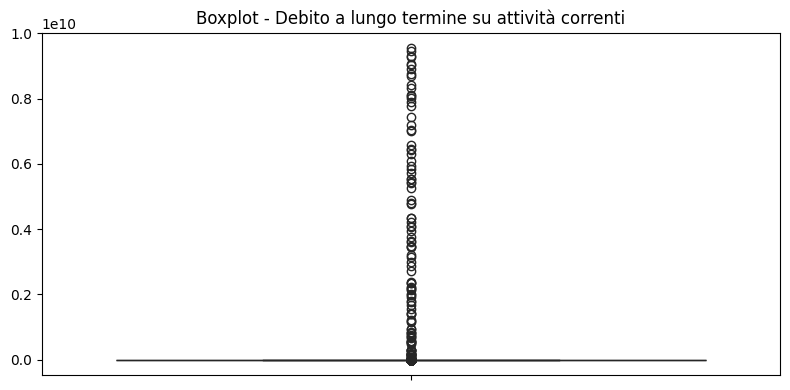

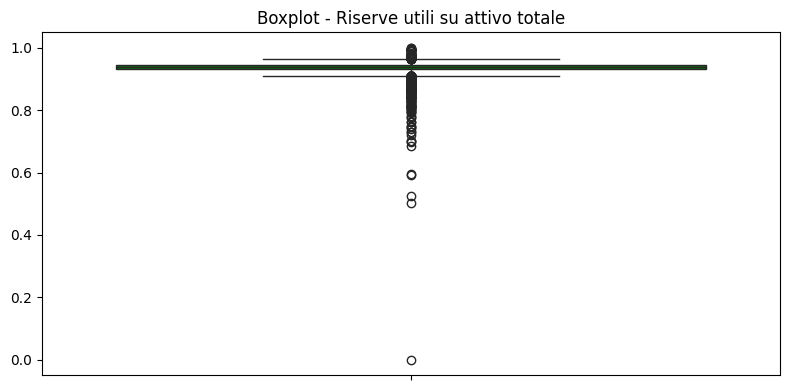

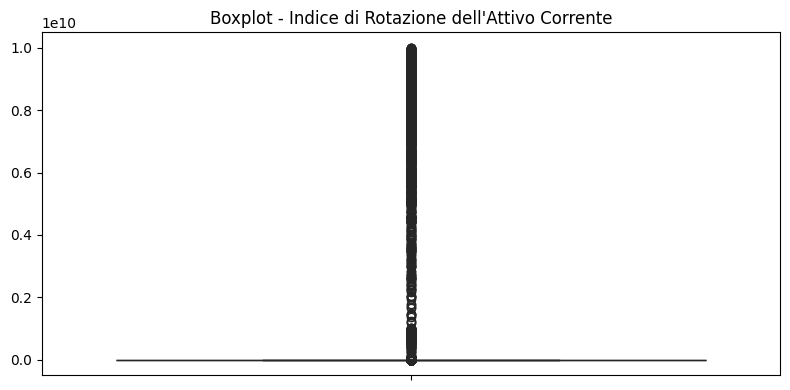

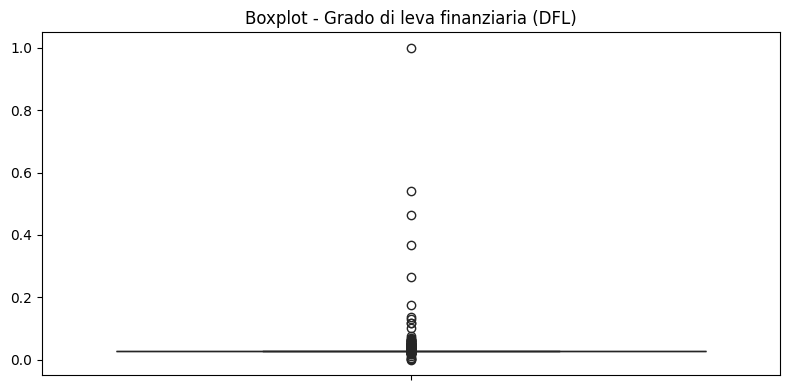

In [26]:
visualization.features_numerical_distribution_boxplot(X_uncorr.drop(['Bancarotta'], axis = 1))

## **CORRELATION WITH TARGET**

Tramite dataframe, visualizziamo la **correlazione tra Target e Features**:
- Dal risultato, possiamo dire che le Features **non sono molto correlate con il Target**

In [27]:
corr_table = pd.DataFrame(columns = ['Column', 'Correlation with Y']) # Inizializzo un dataframe vuoto con due colonne

for i in range(X_uncorr.shape[1]-1): # Utilizzo un ciclo for per riempire corr_table
    corr = X_uncorr['Bancarotta'].corr(X_uncorr.iloc[:, i]) # Calcolo la correlazione tra Y e la X iterata
    corr_table.loc[i] = [X_uncorr.columns[i], corr] # Assegno i valori alle rispettive colonne

# Output
corr_table 

,Column,Correlation with Y
0,Margine Lordo Operativo,-0.100043
1,Tasso di interesse netto dopo le tasse,-0.008857
2,Tasso di Spesa Operativa,-0.006083
3,Aliquota delle spese di ricerca e sviluppo,-0.024232
4,Tasso di flusso di cassa,-0.072356
5,Aliquota degli interessi sul debito,-0.023063
6,Aliquota fiscale (A),-0.109706
7,Valore Netto per Azione (A),-0.165465
8,Flusso di cassa per azione,-0.077516
9,Tasso di crescita dell'utile operativo,-0.015168


## **CORRELATION MATRIX**

Con **correlation_matrix_heatmap()**, visualizziamo tramite heatmap la **correlazione tra le Features**:
- Le Features sono **generalmente poco correlate** tra di loro, questo dimostra che la selezione iniziale effettuata con VIF ha avuto successo
- L'unica correlazione 'significativa' che si può osservare è quella positiva tra **Percentuale di reinvestimento del contante** e **Flusso di cassa per azione**


In [28]:
# Creo la matrice di correlazione includendo solamente le Features
correlation_matrix = X_uncorr.drop(['Bancarotta'], axis = 1).corr() 

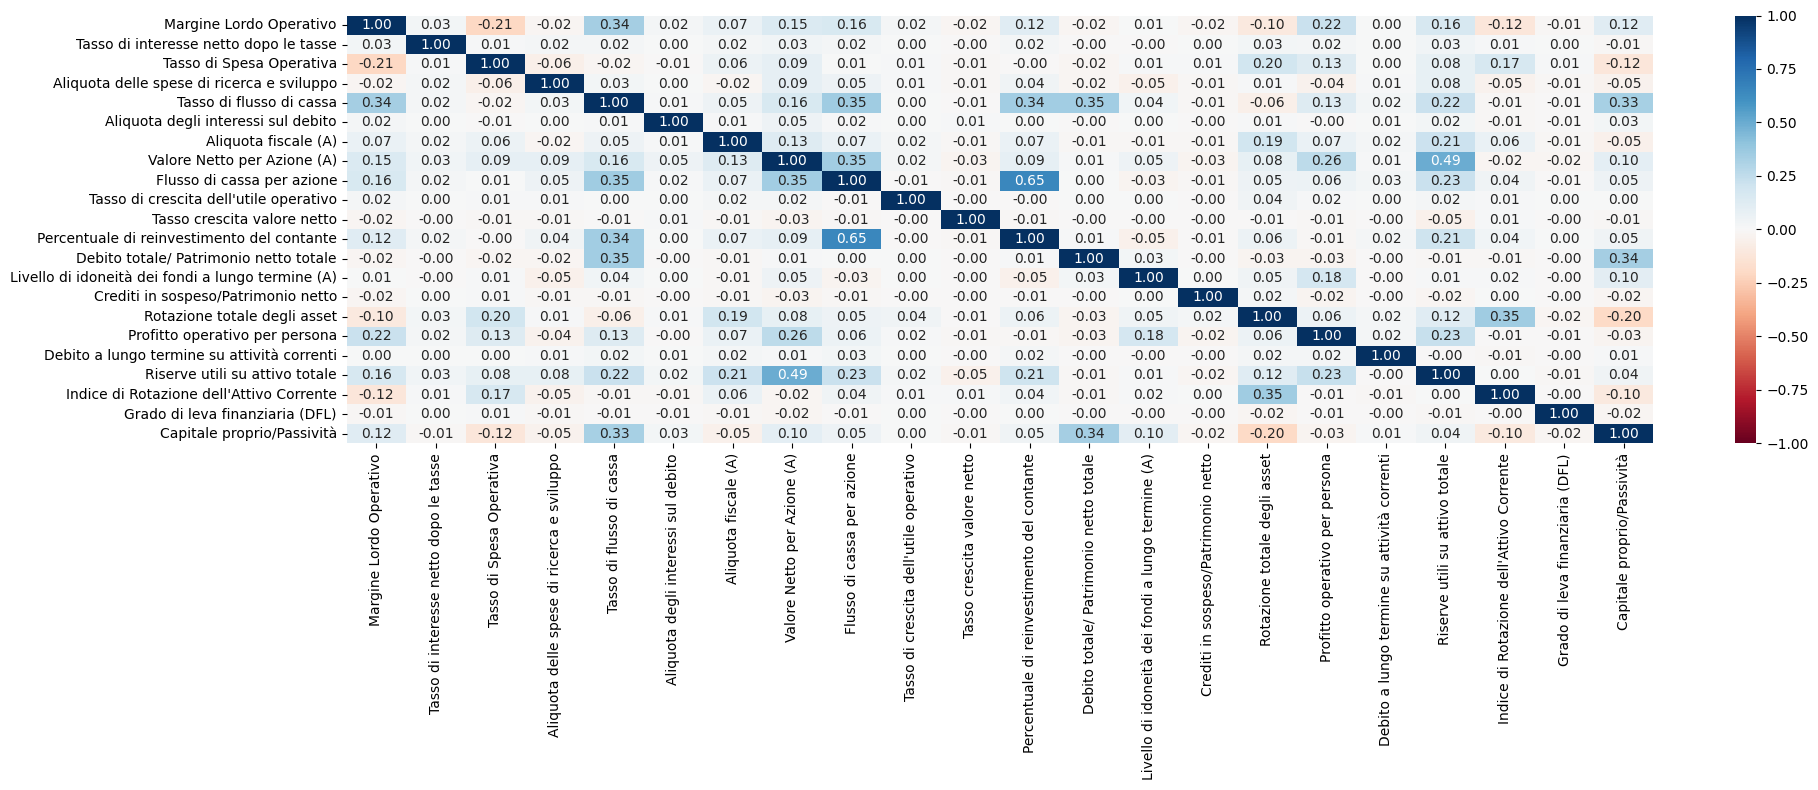

In [29]:
visualization.correlation_matrix_heatmap(correlation_matrix)

## **VISUALIZATION - CONDITIONED PLOTS**
Con **features_numerical_distribution_per_target_boxplot()**, visualizziamo tramite boxplot la **distribuzione delle classi per ogni Features divisa per classi del Target**:
- Osservando i grafici, notiamo che sono presenti **numerosi outliers**


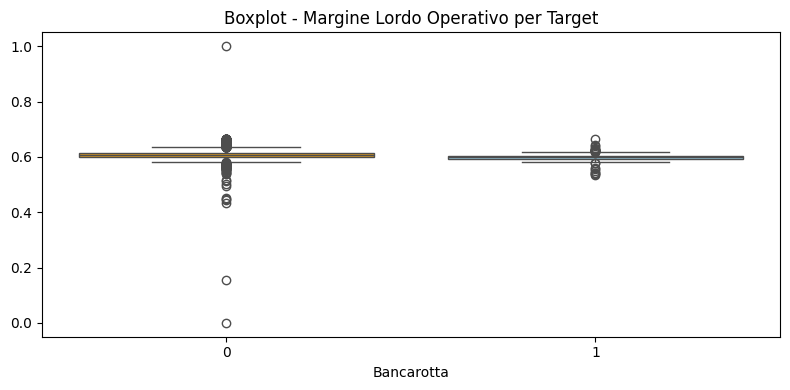

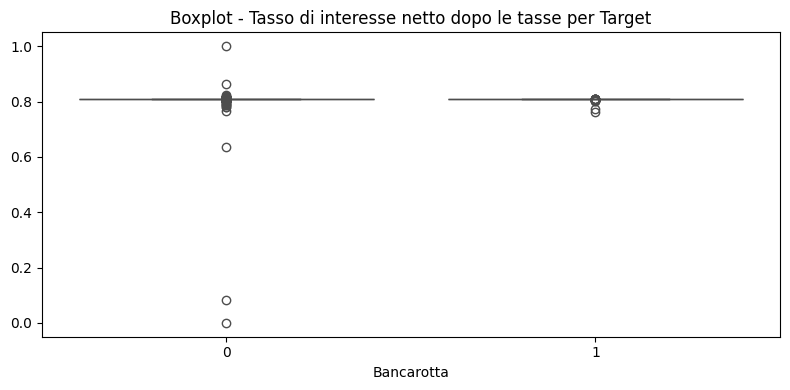

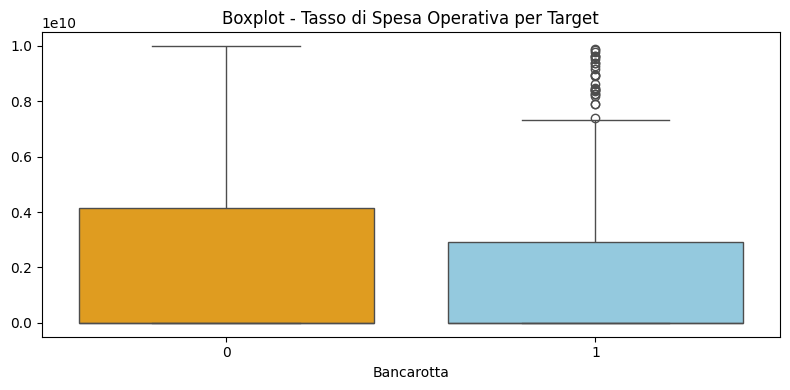

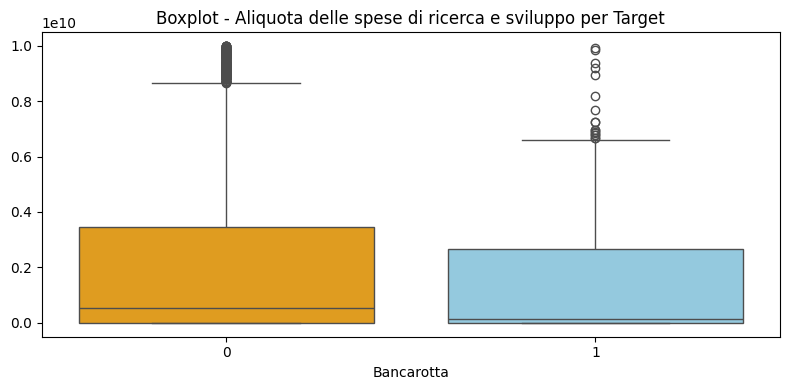

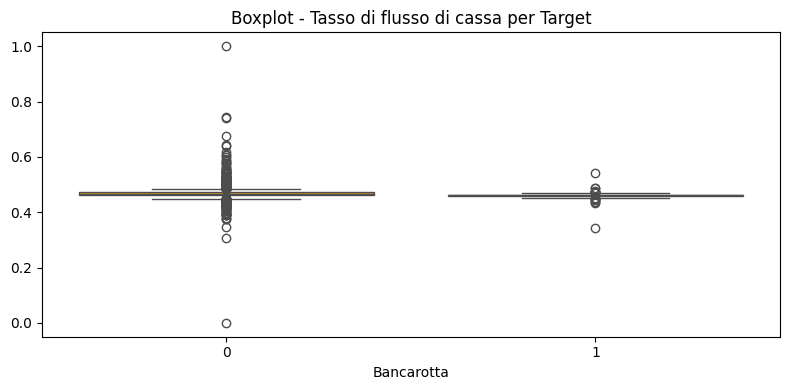

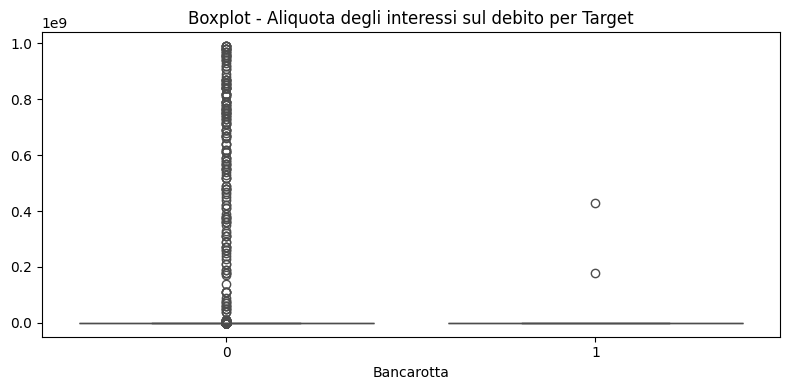

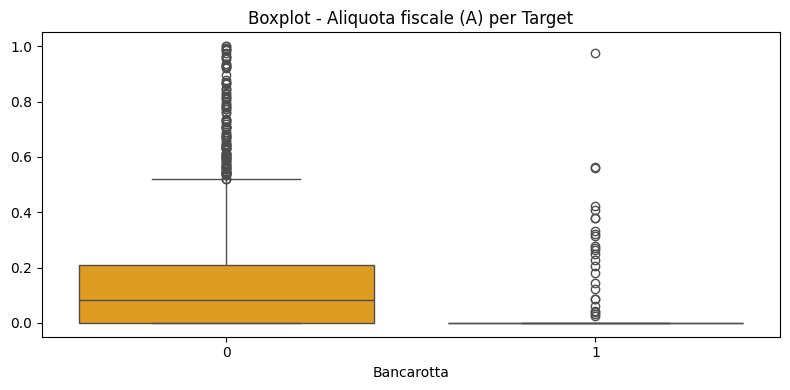

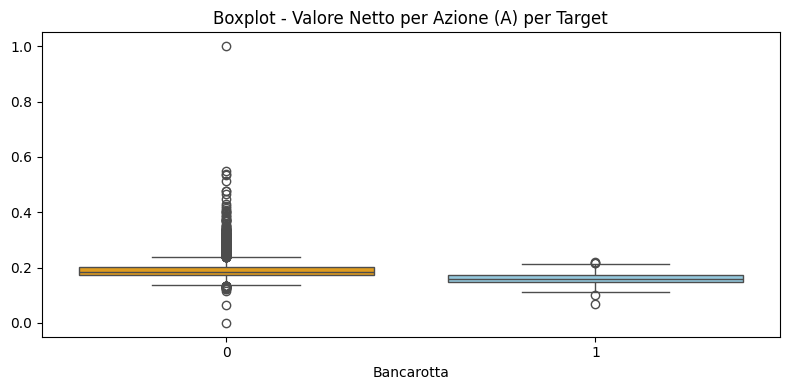

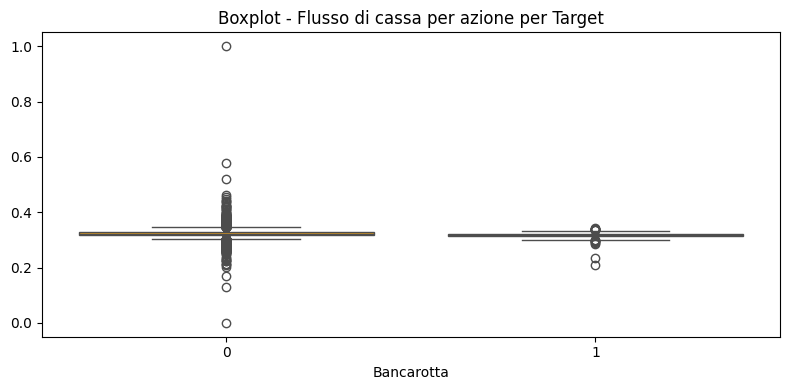

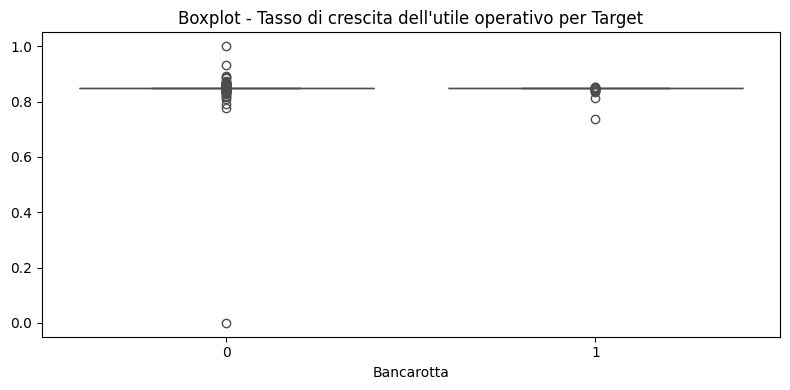

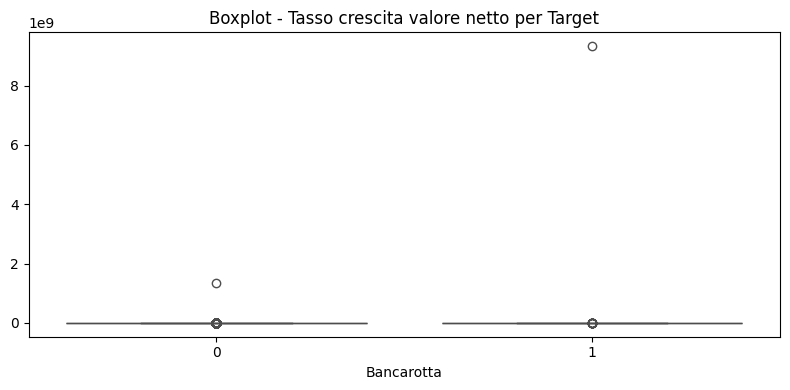

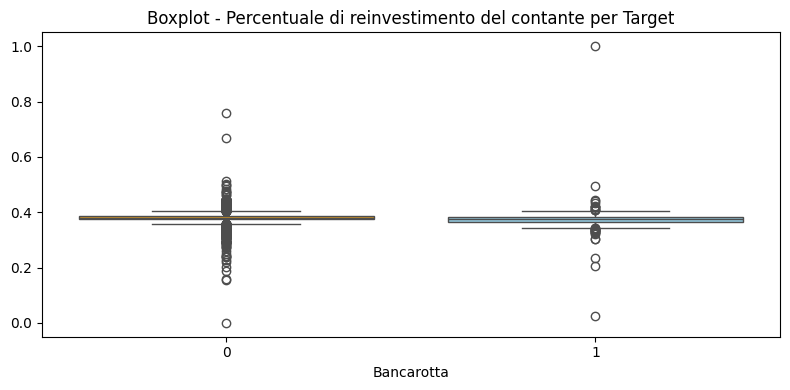

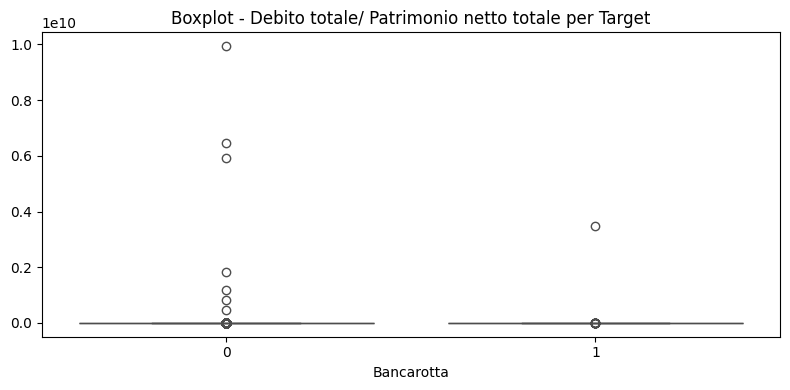

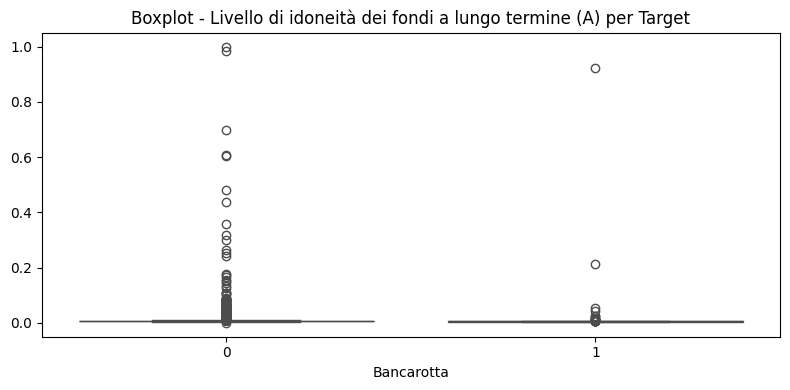

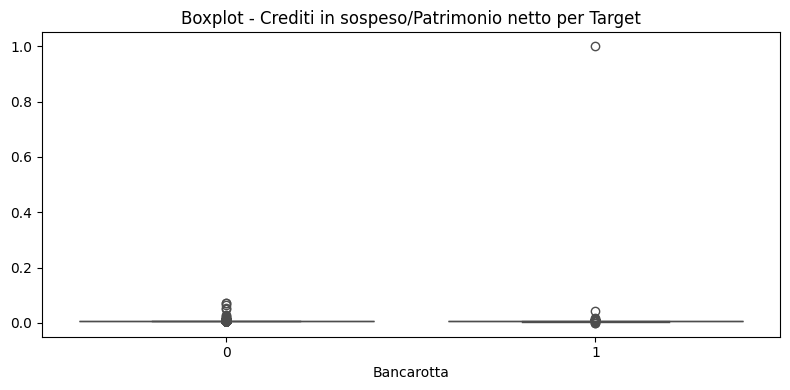

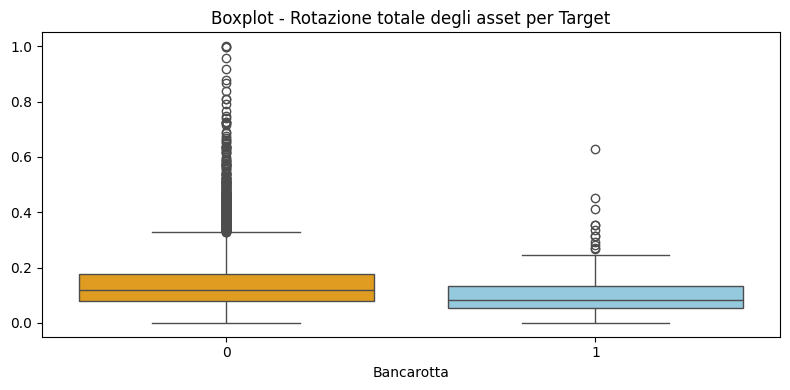

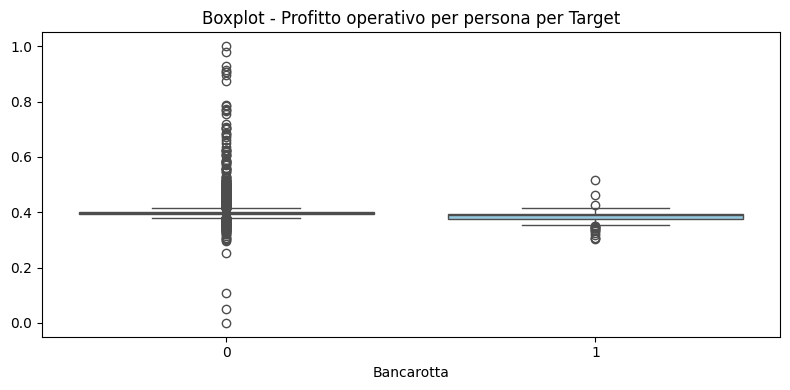

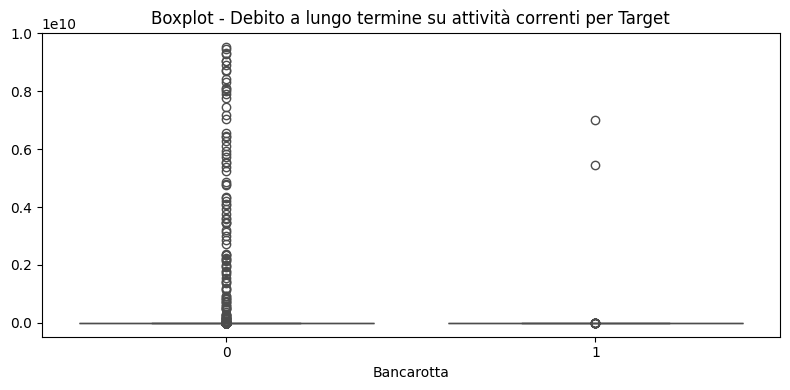

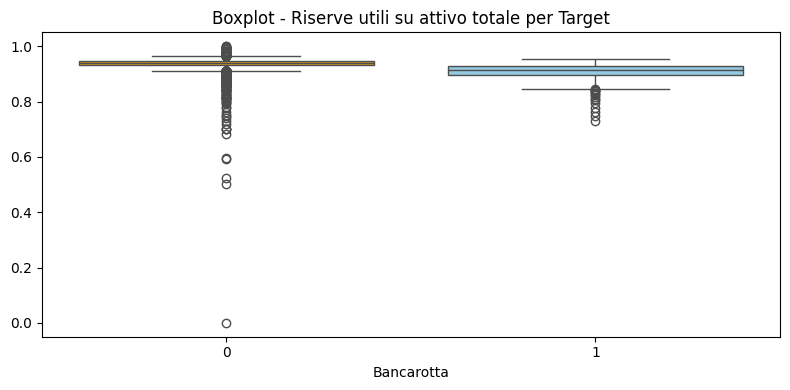

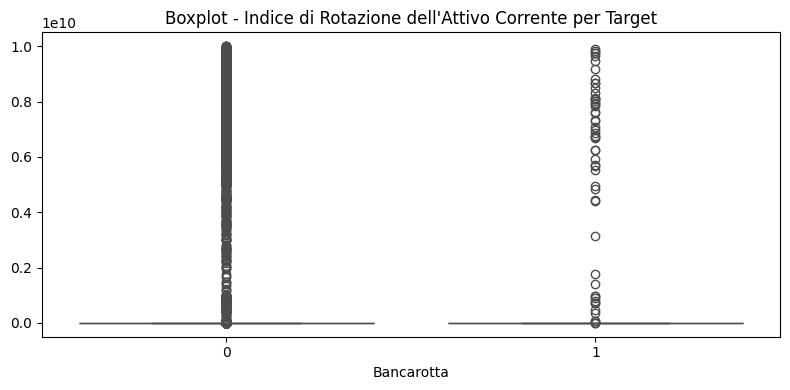

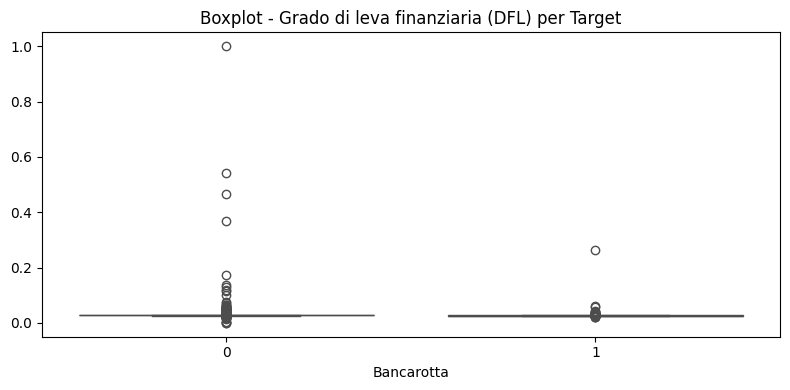

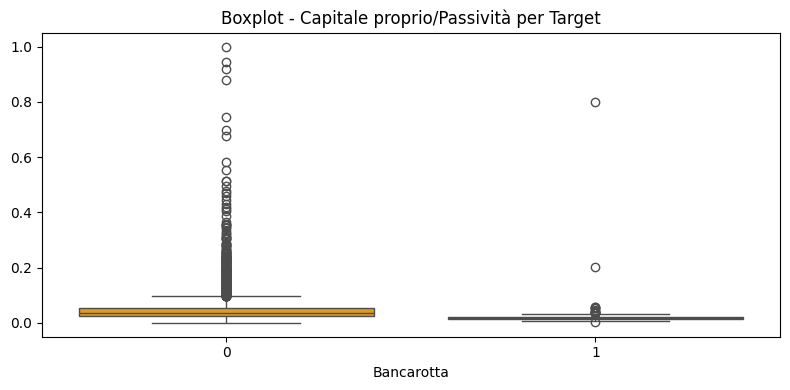

In [30]:
visualization.features_numerical_distribution_per_target_boxplot(X_uncorr)

## **OUTLIERS**

Con **highlight_outliers()**, visualizziamo quanti outliers ci sono per ogni Features, divisi per classi del Target.

In [31]:
outliers_number = outliers.highlight_outliers(X_uncorr)

Numero di Outliers per Features

Margine Lordo Operativo_0: 303
Margine Lordo Operativo_1: 24


Tasso di interesse netto dopo le tasse_0: 763
Tasso di interesse netto dopo le tasse_1: 18


Tasso di Spesa Operativa_0: 0
Tasso di Spesa Operativa_1: 26


Aliquota delle spese di ricerca e sviluppo_0: 170
Aliquota delle spese di ricerca e sviluppo_1: 17


Tasso di flusso di cassa_0: 551
Tasso di flusso di cassa_1: 20


Aliquota degli interessi sul debito_0: 407
Aliquota degli interessi sul debito_1: 2


Aliquota fiscale (A)_0: 113
Aliquota fiscale (A)_1: 26


Valore Netto per Azione (A)_0: 433
Valore Netto per Azione (A)_1: 5


Flusso di cassa per azione_0: 518
Flusso di cassa per azione_1: 19


Tasso di crescita dell'utile operativo_0: 956
Tasso di crescita dell'utile operativo_1: 29


Tasso crescita valore netto_0: 727
Tasso crescita valore netto_1: 15


Percentuale di reinvestimento del contante_0: 582
Percentuale di reinvestimento del contante_1: 31


Debito totale/ Patrimonio netto tot

Con **outliers_to_df()**, creiamo due dataframe:
- uno contiene il numero di outliers per ogni Features per classe del **Target = 0**
- uno contiene il numero di outliers per ogni Features per classe del **Target = 1**


In [32]:
outliers_0_table, outliers_1_table = outliers.outliers_to_df(outliers_number)

Con **outliers_barplot()**, visualizziamo tramite barplot la **distribuzione numerica degli outliers per ogni Features, divisi per classi del Target**:
- Dalla dimensione delle barre, possiamo dire che la distribuzione degli outliers per Target è **simile**
- Compaiono più outliers per **Target = 0** poiché si tratta della **classe dominante** (0: 6599; 1: 220)
- **Tasso di Spesa Operativa** presenta outliers **solo per Target = 1**; questo potrebbe essere interessante, perché ci porta a dire che tale variabile può essere resa **binaria**: 0 = non ci sono outliers; 1 = ci sono outliers

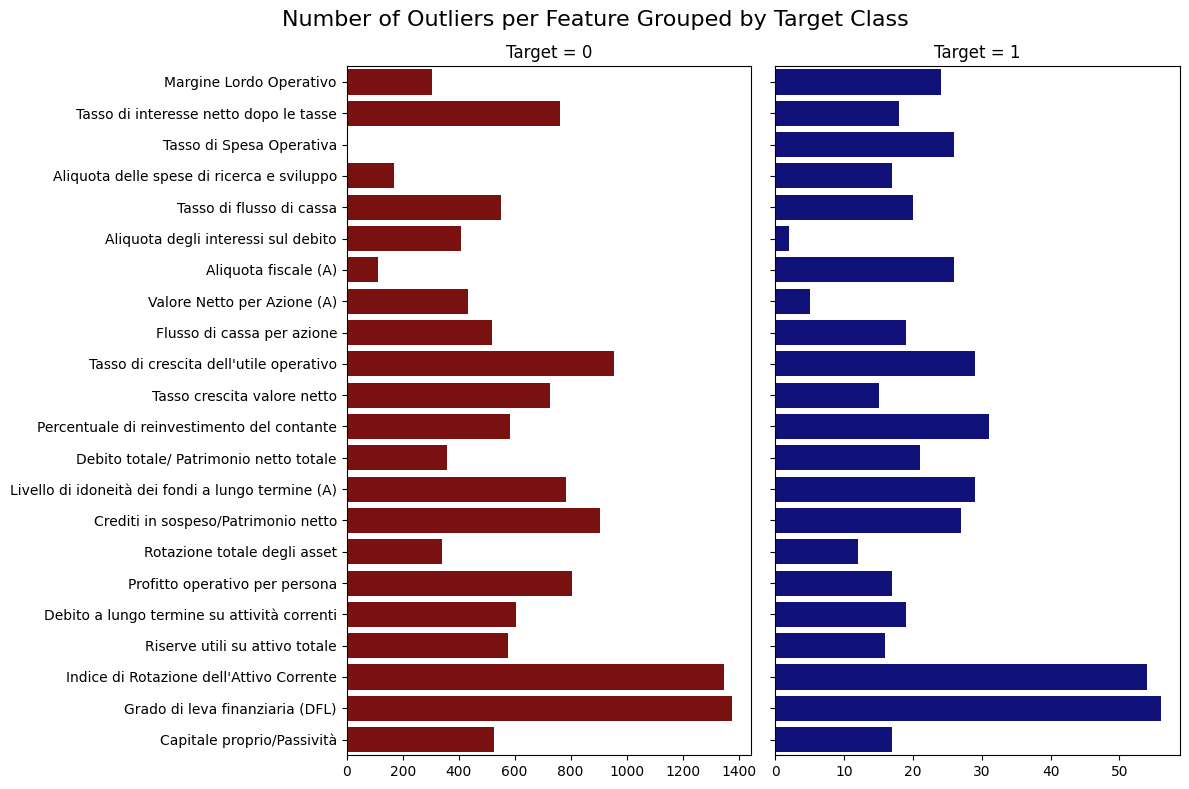

In [33]:
visualization.outliers_barplot(outliers_0_table, outliers_1_table)

Osservando attentamente la **distribuzione numerica delle Features per classi del Target**, alcune di esse presentano degli **outliers estremi**. Le features interessate sono le seguenti:
- Crediti in sospeso/Patrimonio netto
- Debito totale/Patrimonio netto totale
- Flusso di cassa per azione
- Grado di leva finanziaria
- Margine Lordo Operativo
- Percentuale di reinvestimento del contante
- Riserve utili su attivo totale
- Tasso di crescita valore netto 
- Tasso di crescita dell'utile operativo
- Tasso di flusso di cassa
- Tasso di interesse netto dopo le tasse
- Valore Netto per Azione (A)

Con **remove_outliers()**, rimuoviamo gli outliers estremi presenti nelle Features menzionate sopra, utilizzando la tecnica dell'**Intervallo Interquartile** (IQR-based outlier removal).

In [34]:
# Isolo le Features con outliers estremi
features_with_extreme_outliers = [
    'Crediti in sospeso/Patrimonio netto', 
    'Debito totale/ Patrimonio netto totale',
    'Flusso di cassa per azione',
    'Grado di leva finanziaria (DFL)',
    'Margine Lordo Operativo',
    'Percentuale di reinvestimento del contante',
    'Riserve utili su attivo totale',
    'Tasso crescita valore netto',
    "Tasso di crescita dell'utile operativo",
    'Tasso di flusso di cassa',
    'Tasso di interesse netto dopo le tasse',
    'Valore Netto per Azione (A)'
    ]

In [35]:
# Inizializzo un nuovo dataset uguale a quello attuale, che conterrà le Features senza outliers estremi
X_uncorr_clean = X_uncorr.copy()

# Procedo alla rimozione degli outliers
X_uncorr_clean = outliers.remove_outliers(X_uncorr, X_uncorr_clean, features_with_extreme_outliers)

Outliers individuati: 561
Osservazioni rimosse: 447


Con **df_clean_boxplot()**, facciamo un confronto grafico tra la distribuzione numerica delle Features **pre-cleaning** (con outliers) e quella **post-cleaning** (senza outliers).

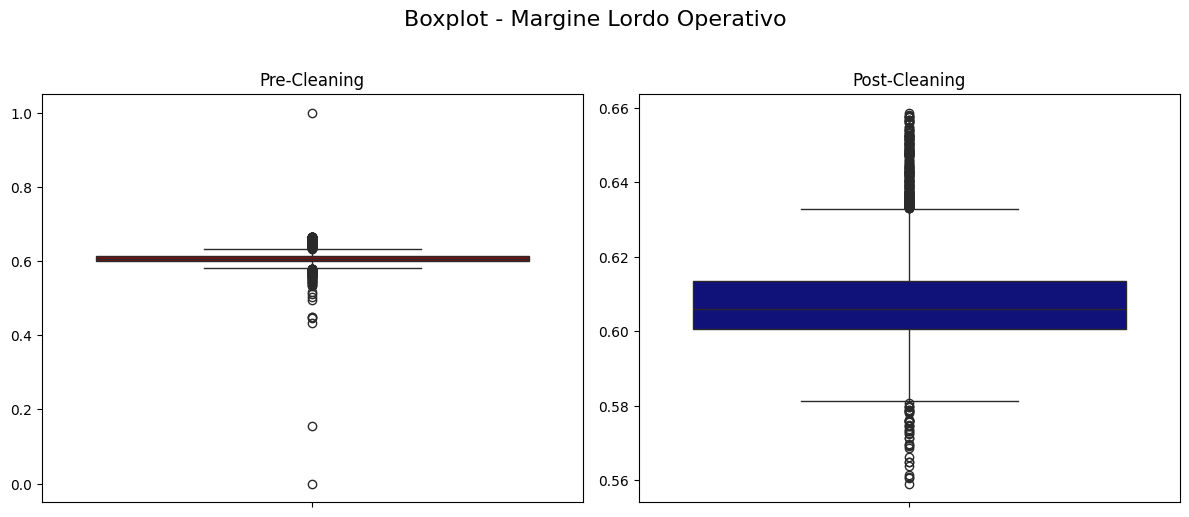

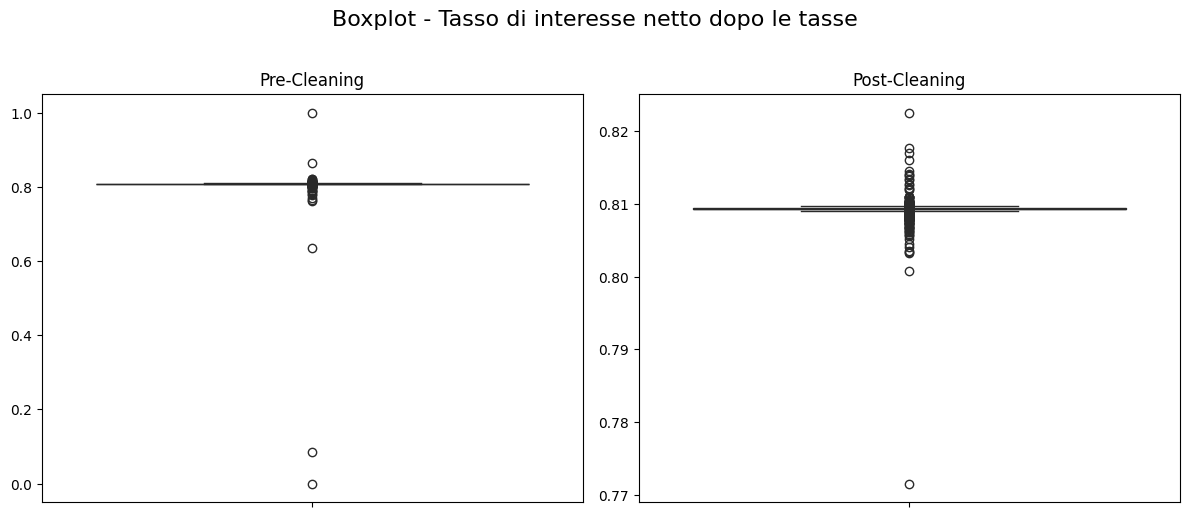

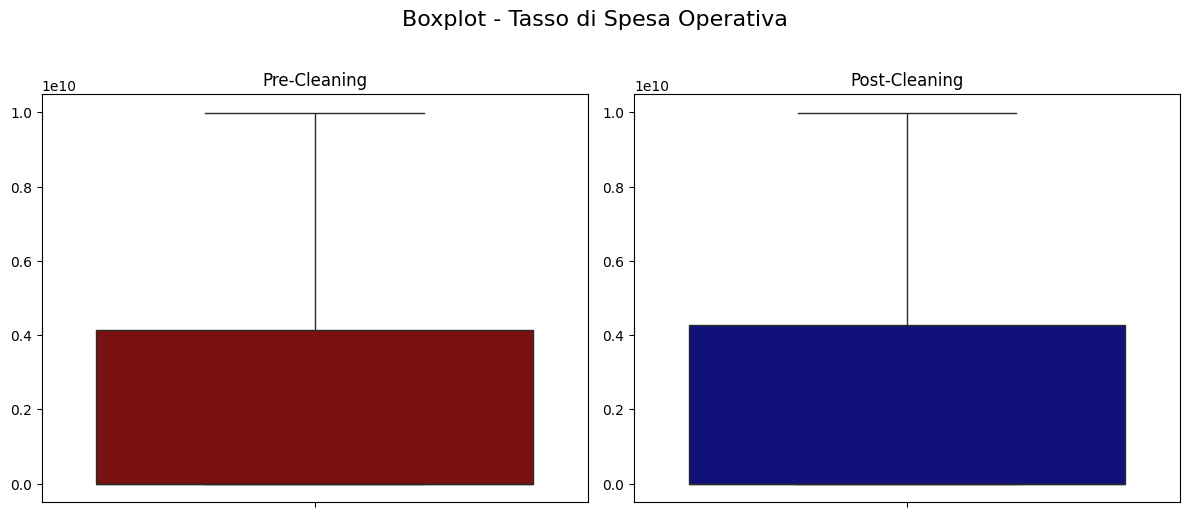

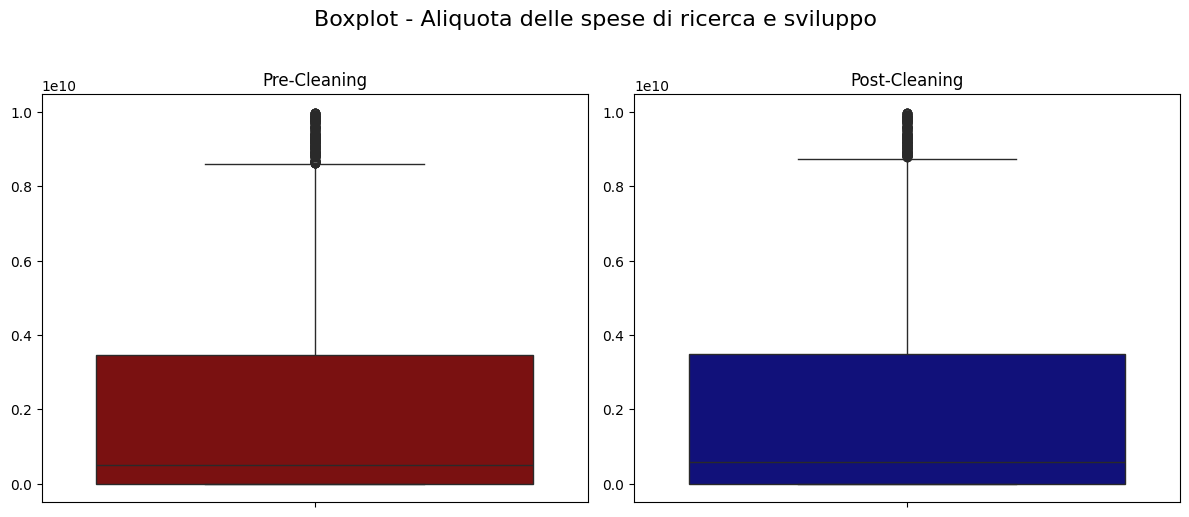

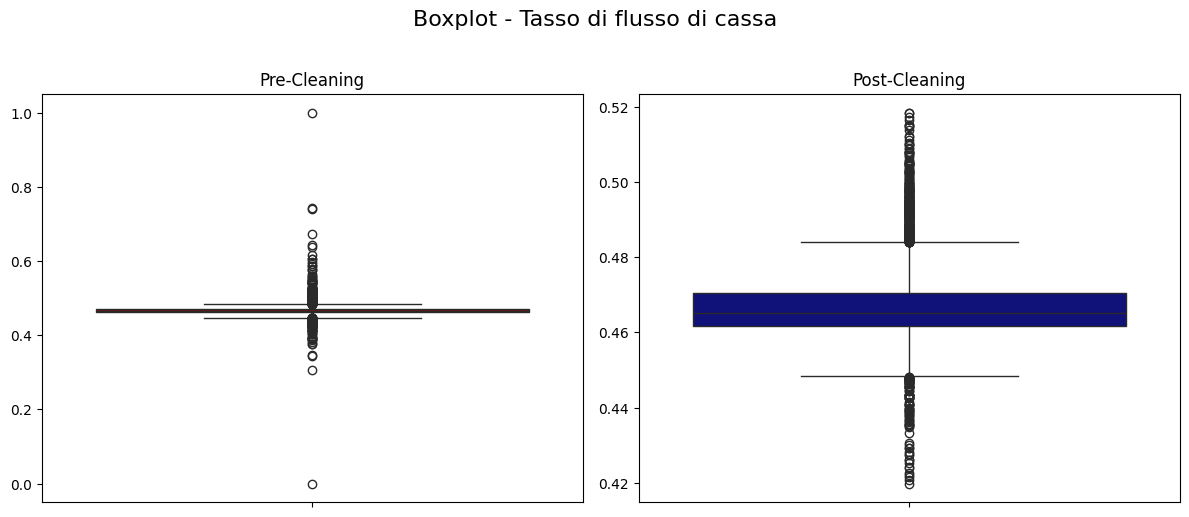

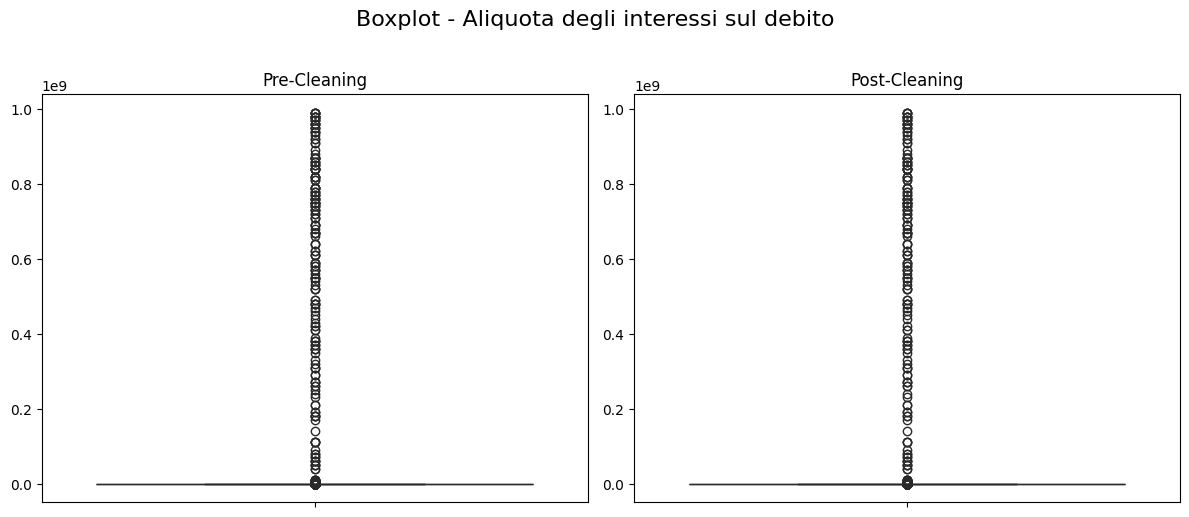

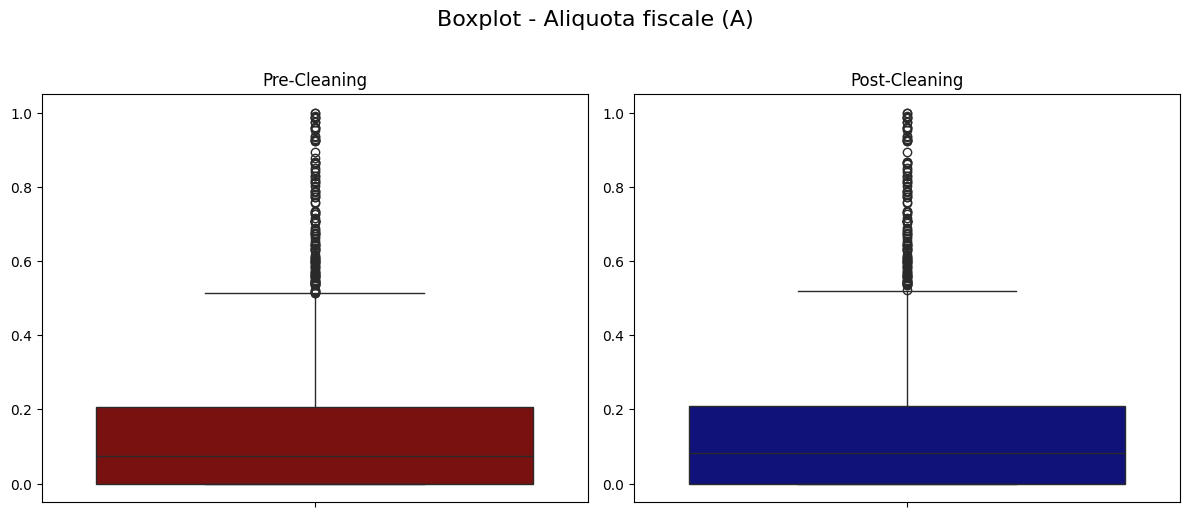

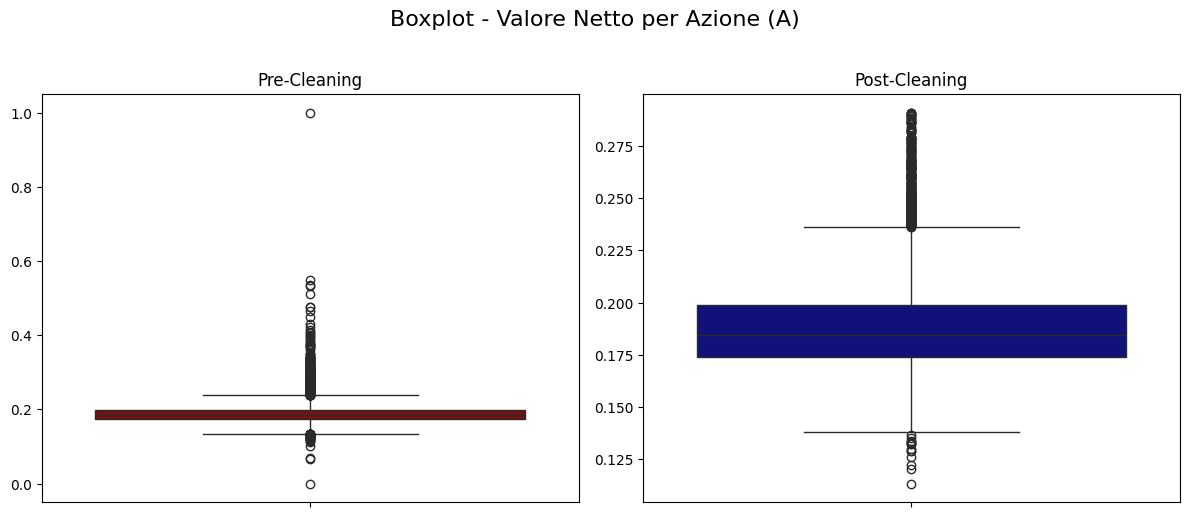

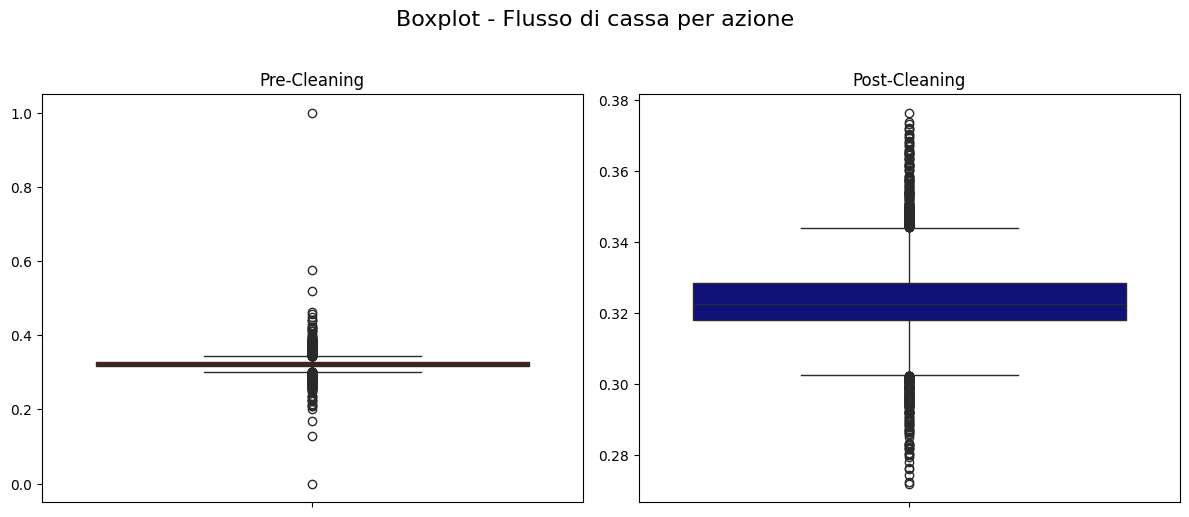

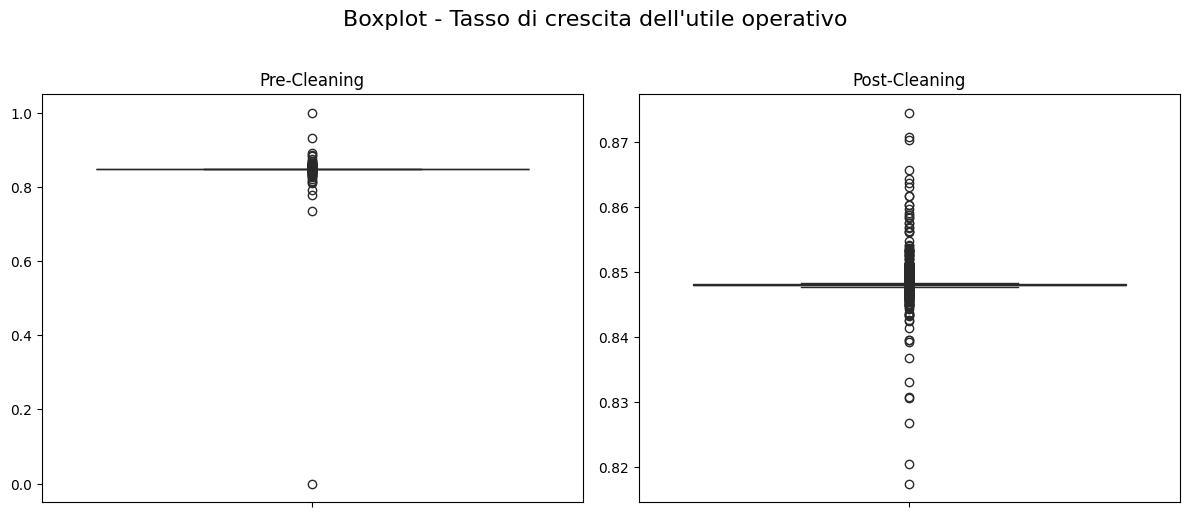

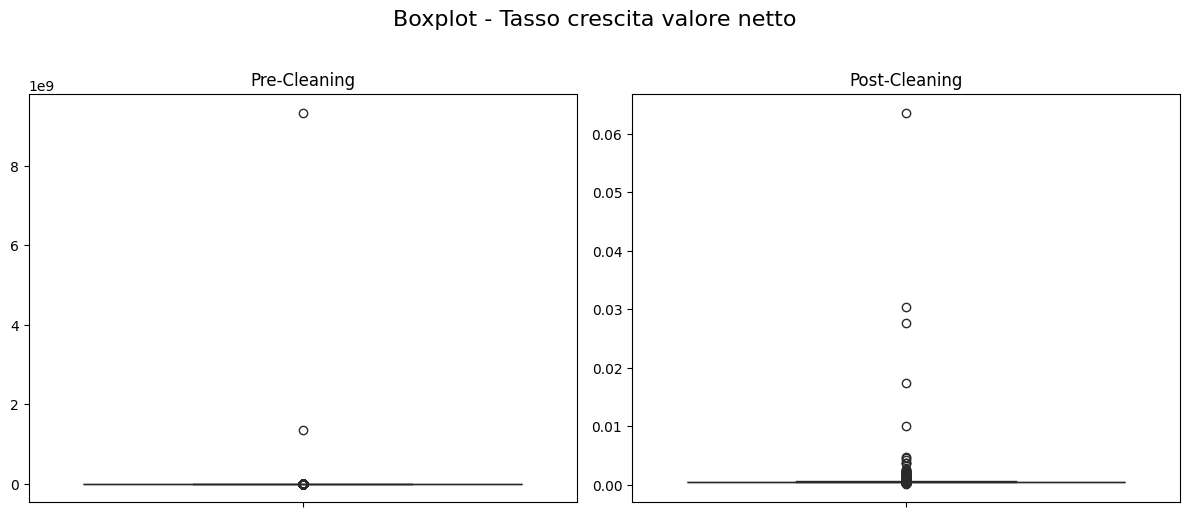

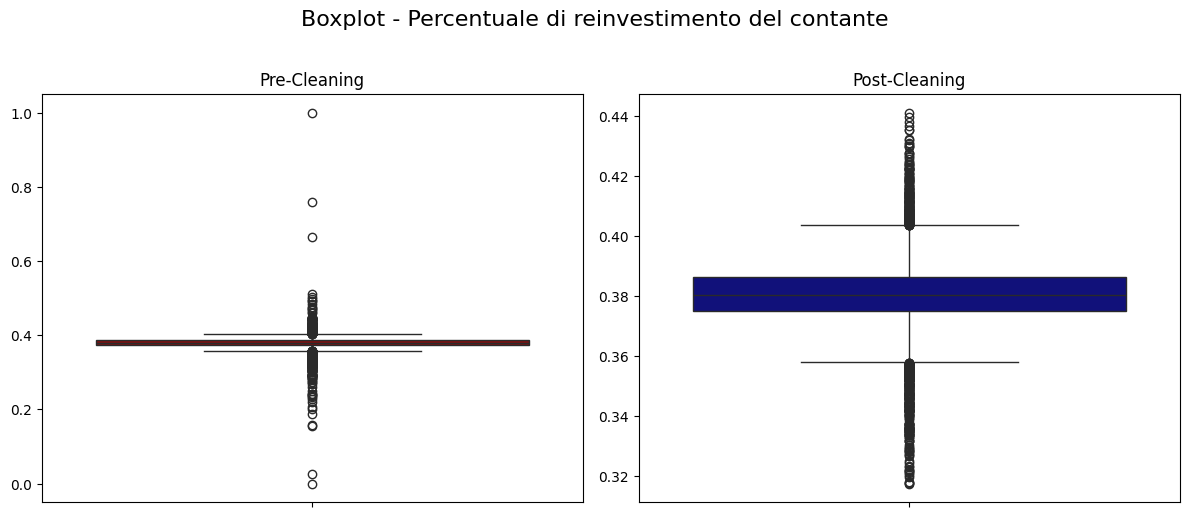

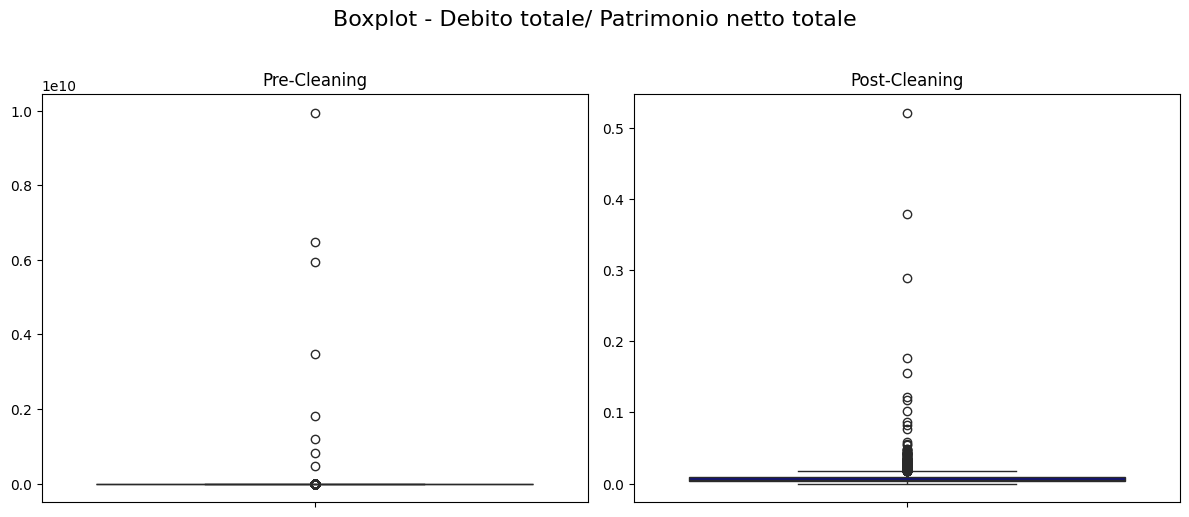

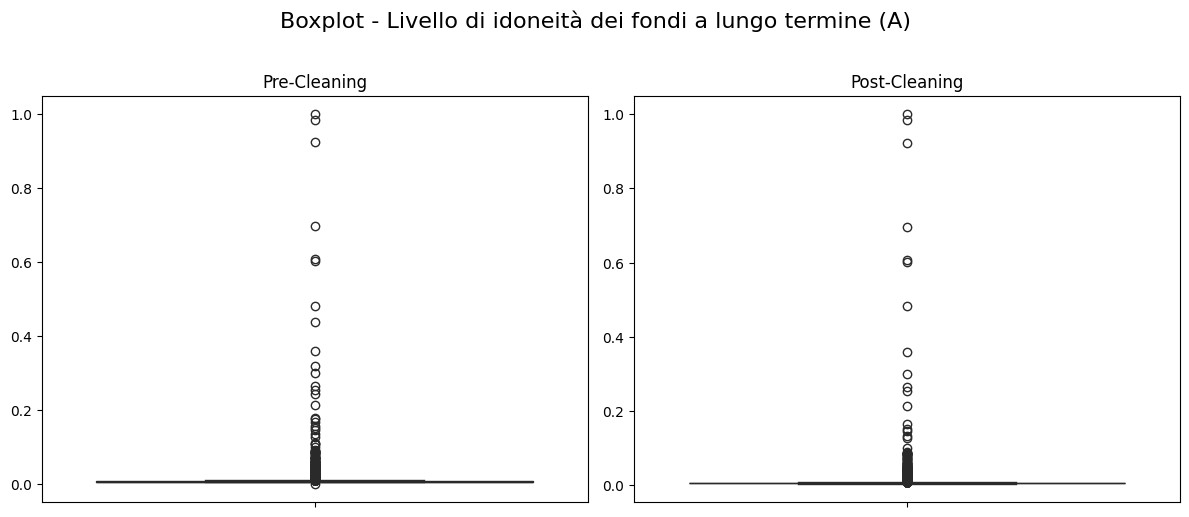

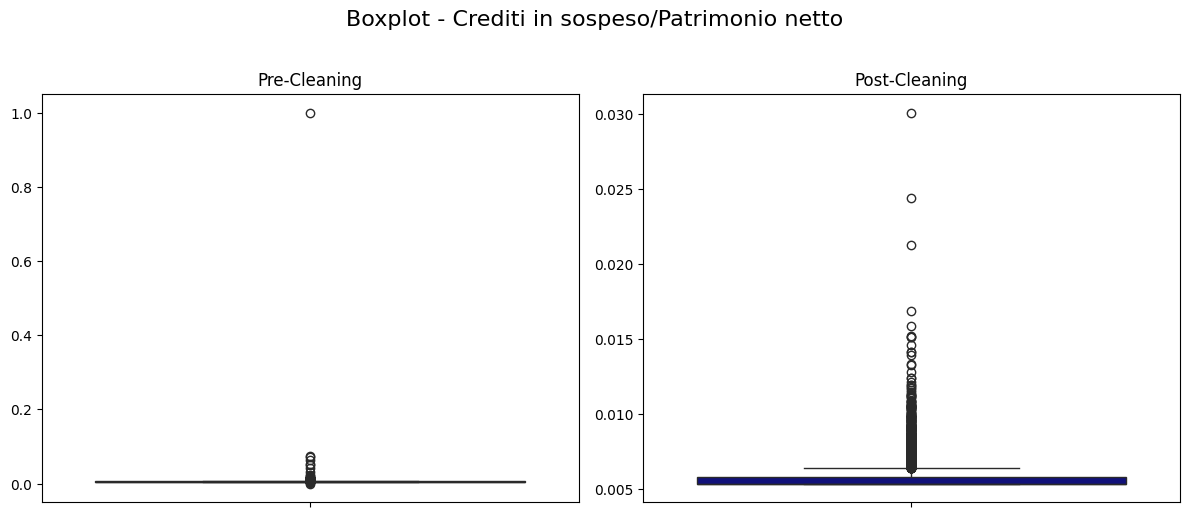

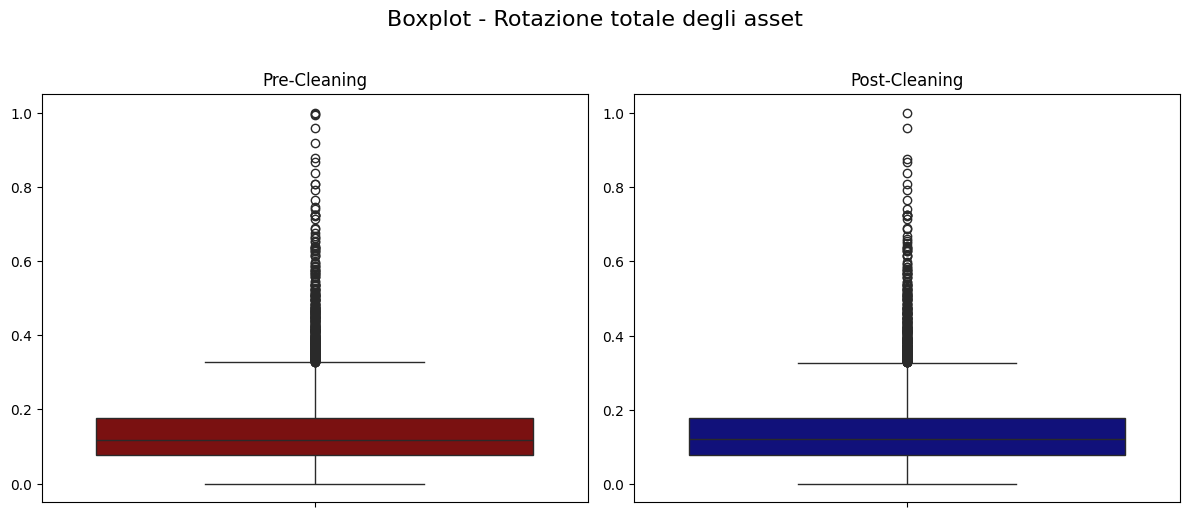

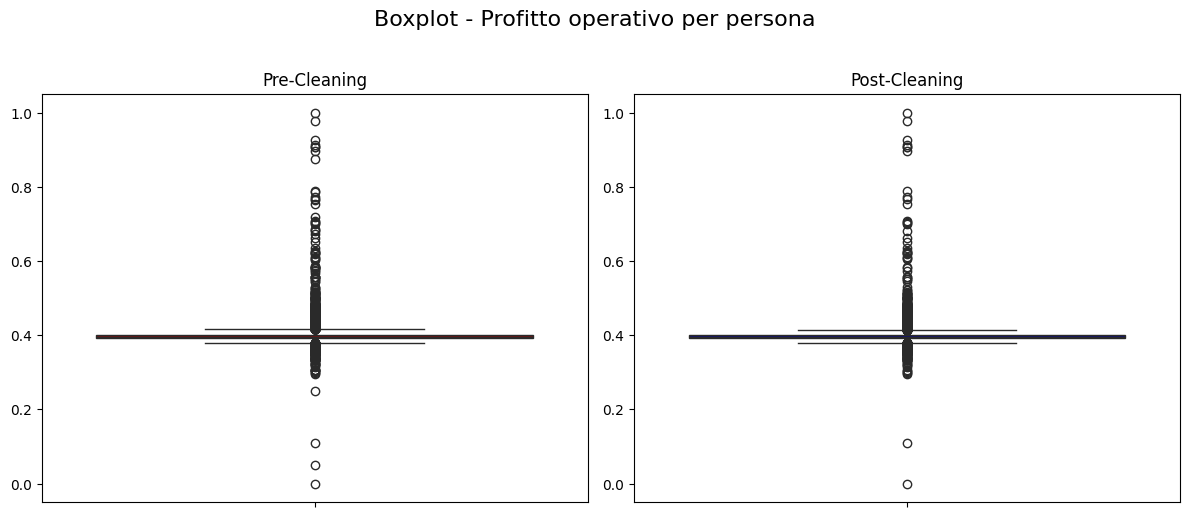

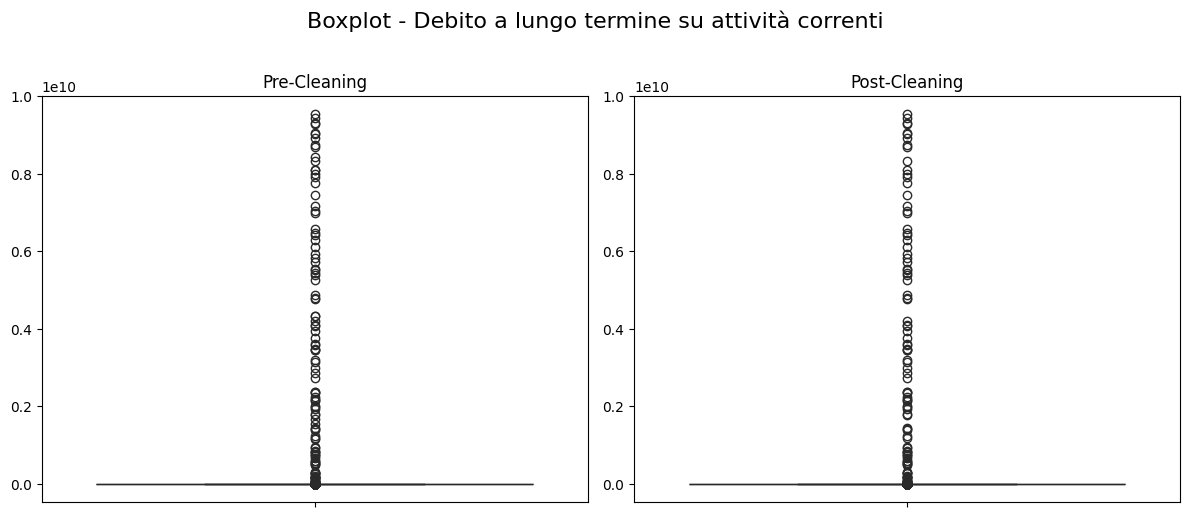

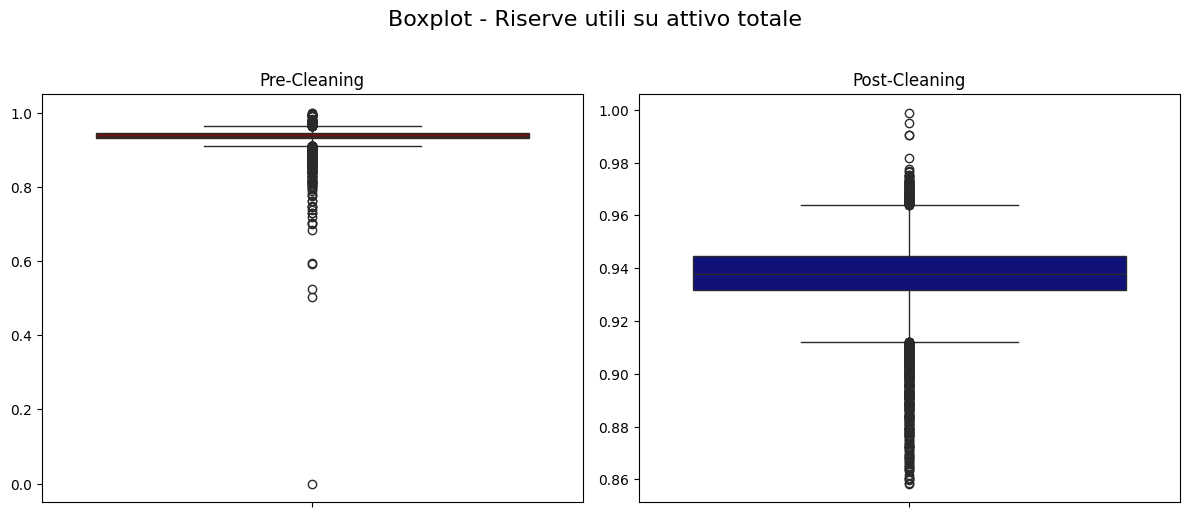

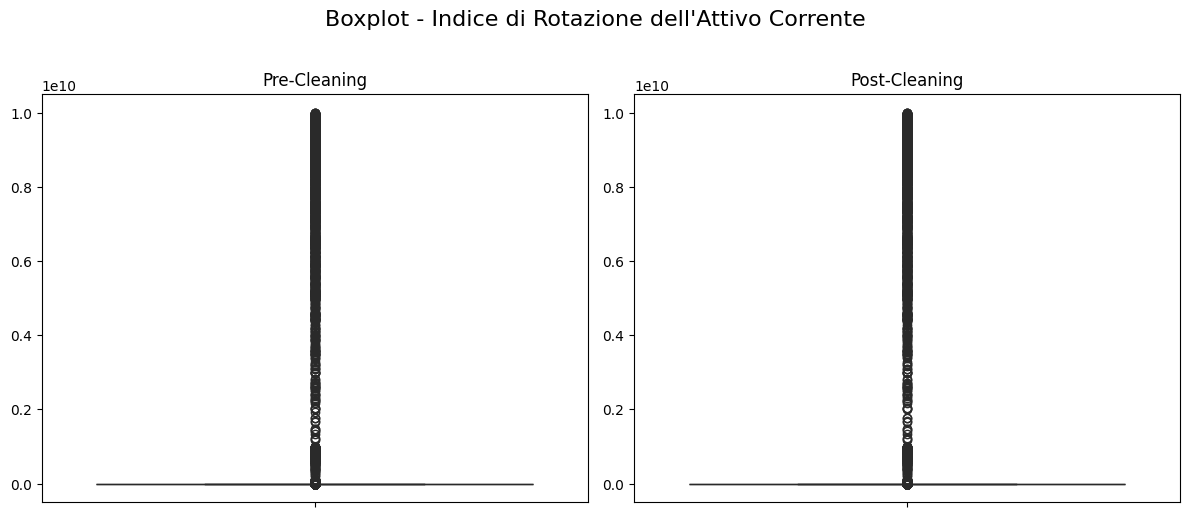

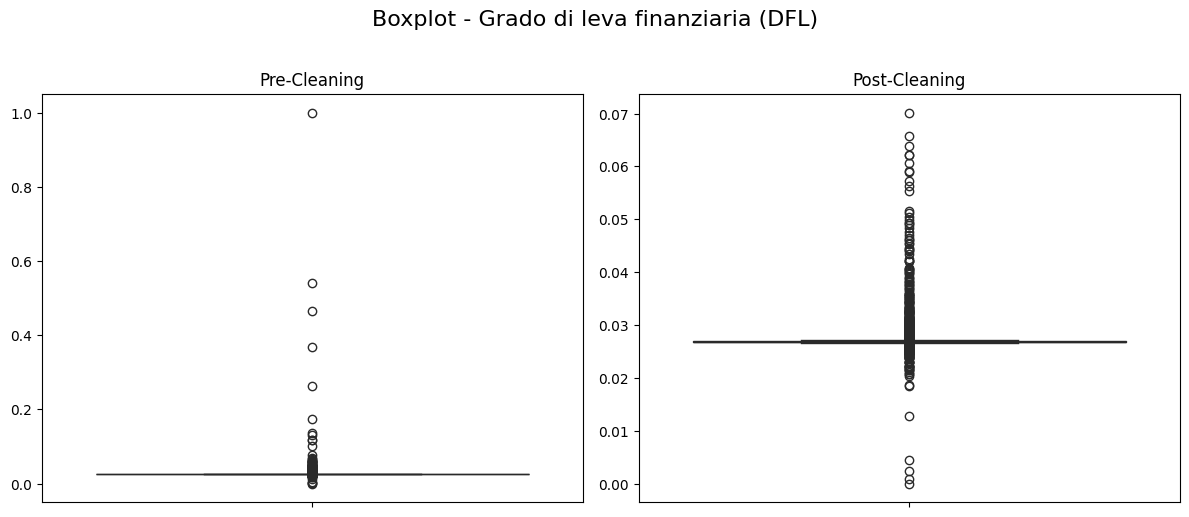

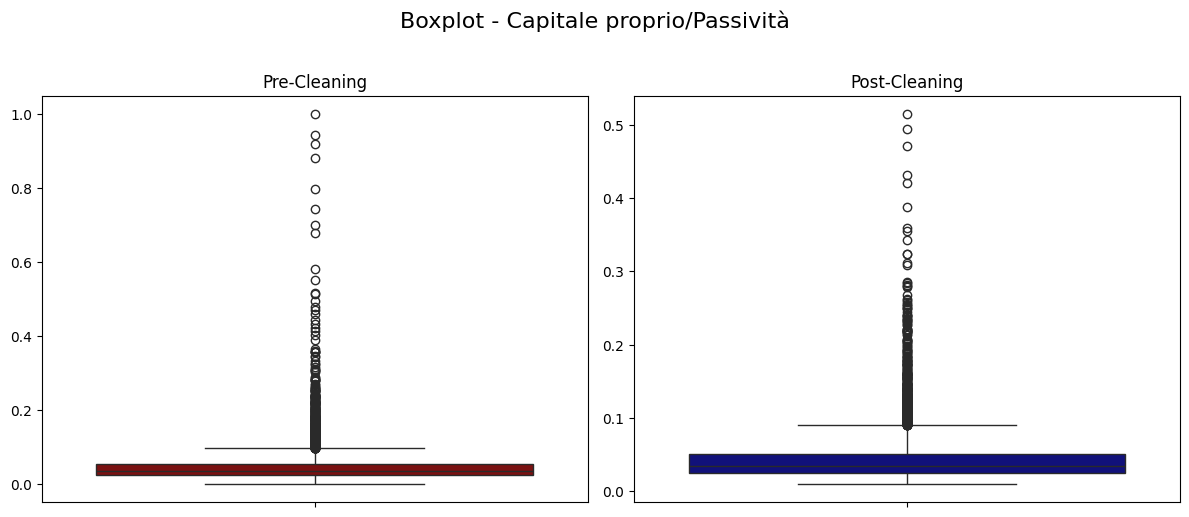

In [36]:
visualization.df_clean_boxplot(X_uncorr.drop(['Bancarotta'], axis = 1), X_uncorr_clean.drop(['Bancarotta'], axis = 1))

## **UNDERSAMPLING**

Visualizziamo la distribuzione delle classi del Target **senza outliers estermi**:
- 0: 6189
- 1: 183

In [37]:
X_uncorr_clean['Bancarotta'].value_counts()

Bancarotta
0    6189
1     183
Name: count, dtype: int64

Con **target_class_distribution_pie()**, visualizziamo tramite pie chart la distribuzione delle classi del target senza outliers.

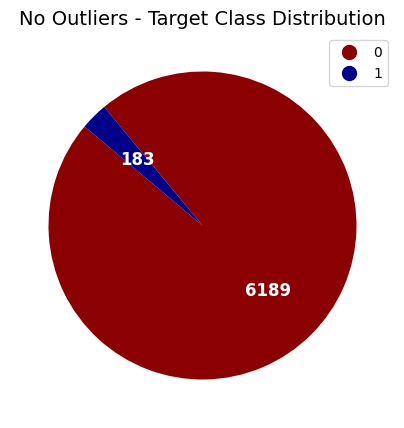

In [38]:
visualization.target_class_distribution_pie('No Outliers', X_uncorr_clean['Bancarotta'].value_counts()[0], X_uncorr_clean['Bancarotta'].value_counts()[1])

Con **undersampling()**, effettuiamo un'operazione di **undersampling** per **bilanciare le classi del Target**:
- Necessaria per **aumentare il potere predittivo** del modello
- Vengono selezionati **183 valori casuali per Target = 0**, eliminando i rimanenti, in modo da raggiungere il **bilanciamento**

In [39]:
X_uncorr_balanced, index_class_1, same_size_index_class_0, index_class_0 = preprocessing.undersampling(X_uncorr_clean)

Numero di osservazioni totali: Bancarotta
1    183
0    183
Name: count, dtype: int64


Con **undersampling_impact_pie()**, visualizziamo graficamente tramite piechart l'**impatto dell'undersampling**

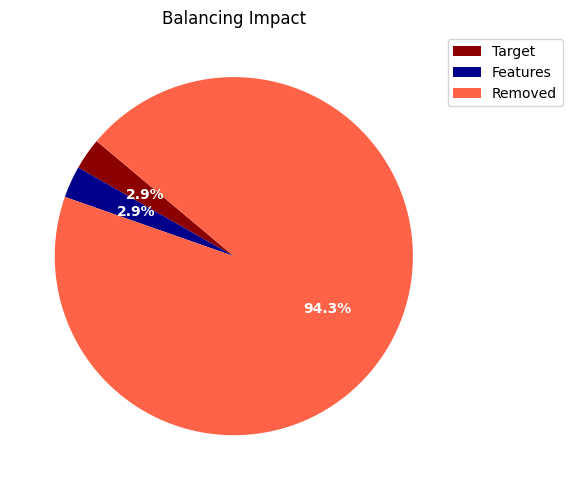

In [40]:
visualization.undersampling_impact_pie(index_class_1, same_size_index_class_0, index_class_0)

Con **target_class_distribution_pie()**, visualizziamo tramite pie chart la distribuzione delle classi del target dopo l'undersampling.

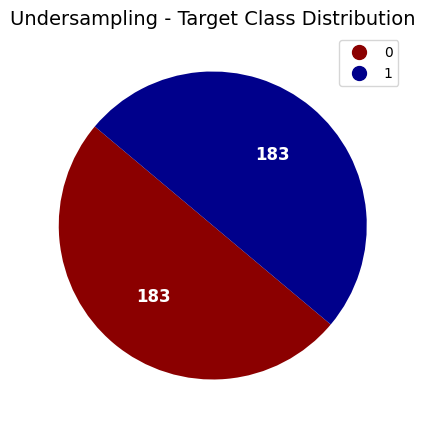

In [41]:
visualization.target_class_distribution_pie('Undersampling', X_uncorr_balanced['Bancarotta'].value_counts()[0], X_uncorr_balanced['Bancarotta'].value_counts()[1])

## **TRAIN-TEST SPLIT**

Dividiamo il dataset in **Train** e **Test set** per l'allenamento del modello.

In [42]:
y = X_uncorr_balanced['Bancarotta'] # Isolo il Target
x = X_uncorr_balanced.drop(['Bancarotta'], axis = 1) # Isolo le Features

# Procedo allo split tra Train e Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Con **train_test_class_distribution_pie()**, visualizziamo tramite pie chart la distribuzione delle classi del target dopo il Train-Test Split.

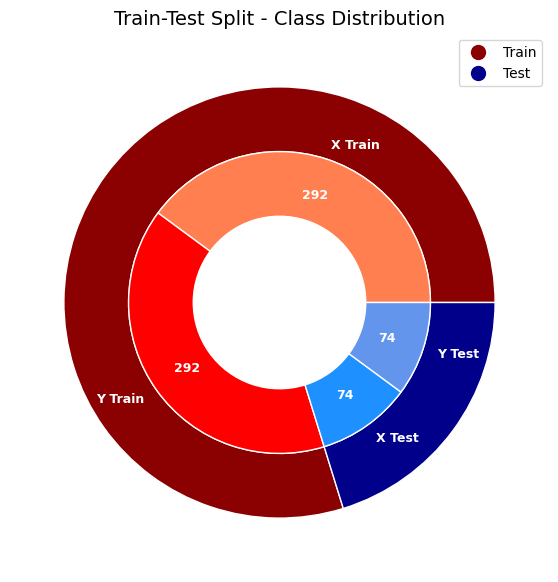

In [43]:
visualization.train_test_class_distribution_pie('Train-Test Split', X_train, y_train, X_test, y_test)

## **OVERSAMPLING**

Con **oversampling()**, effettuiamo un'operazione di **oversampling** sulla **classe minoritaria del Target** (1), creando l'**80% di nuove osservazioni** tramite **SMOTE**. In questo modo, avendo più dati a disposizione, possiamo garantire la **robustezza del modello**.

In [44]:
X_train_smote, y_train_smote = preprocessing.oversampling(X_uncorr_clean, X_train, X_test, y_train)

(524, 22)
Bancarotta
1    262
0    262
Name: count, dtype: int64


Con **oversampling_impact_pie()**, visualizziamo graficamente tramite piechart l'**impatto dell'oversampling**.

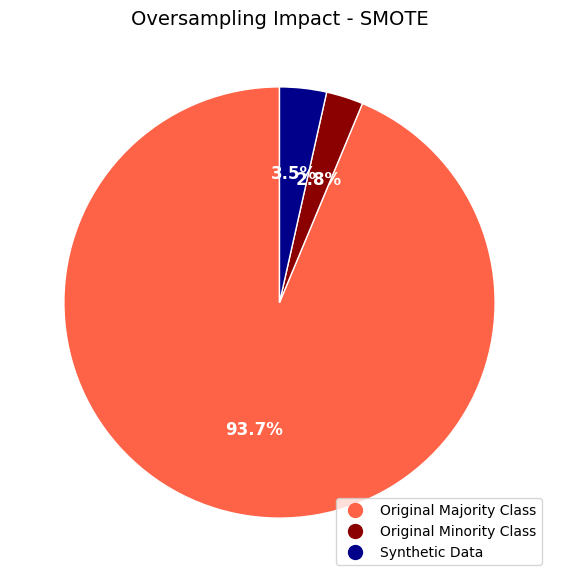

In [45]:
visualization.oversampling_impact_pie(X_uncorr_clean, y_train, y_train_smote)

Con **target_class_distribution_pie()**, visualizziamo tramite pie chart la distribuzione delle classi del target dopo l'oversampling.

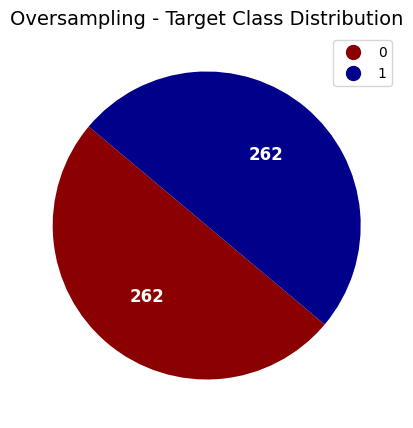

In [46]:
visualization.target_class_distribution_pie('Oversampling', y_train_smote.value_counts()[0], y_train_smote.value_counts()[1])